# Anticipez les besoins en consommation de bâtiments

# Notebook Exploratoire

# Sommaire

**<a href="#C1"> Présentation de la mission </a>**

**<a href="#C2">  I - Préparation et aperçu du jeu de données</a>**

**<a href="#C3"> II - Analyse des Indicateurs d'Usage des bâtiments</a>**
- A - Usage majoritaire (Largest Use Type)
- B - Usage Primaire (Primary Use Type)

**<a href="#C4"> III- Analyse des indicateurs Géographiques</a>**
- A - Quartier (Neighborhood)
- B - District (CouncilDistrictCode)
- C - Longitude et Latitude

**<a href="#C5"> IV- Analyse des Indicateurs Architecturaux</a>**

**<a href="#C6"> V-  Analyse des variables à prédire : SiteEnergyUse(kBtu) + TotalGHGEmissions </a>**

**<a href="#C7"> VI - Création du jeu de données pour la modélisation</a>**


# <a name="C1"> Présentation de la mission</a>

**Contexte :**
La ville de Seattle souhaite devenir une ville neutre en émission de carbone en 2050.


**Mission :**
- Analyser la **consommation en énergie** et les **émissions de GES** des bâtiments non destinés à l’habitation.
- Tenter de prédire ces deux valeurs à partir des propriétés géographiques, architecturales et d’usage des bâtiments. 
- Tester la pertinence de l’indicateur ENERGYSTARScore, difficile et couteux à acquérir. 

**Données :**
Relevé des différents indicateurs pour les bâtiments de Seattle pour l’année 2016. 



&nbsp;

&nbsp;

**Résumé du Feature Engineering :**

L'ingéniérie de variables (Feature engineering) est une étape importante à réaliser avant la modélisation.
&nbsp;

Dans ce Notebook, les modifications des variables ont lieu tout au long de l'analyse exploratoire.
&nbsp;

Un résumé de cet étape est présenté ci-dessous :
 - Modification des groupes d'Usage Primaire
 - Création d'une colonne sur le ratio de la surface de parking / surface totale 
 - Création d'une colonne sur le ratio de la surface d'usage majoritaire / surface totale
 - Création d'une colonne "residential" pour filtrer les bâtiments résidentiels
 - Selection des colonnes d'intérets
 - Retrait des valeurs manquantes
 - Transformation en Log+1 de certaines variables numériques
 - Encodage OneHot des variables catégorielles

# <a name="C2"> I - Préparation et aperçu du jeu de données </a>

In [1]:
#Importation des librairies de base

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importation des données

df = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [3]:
#Aperçu des informations du jeu de données

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [4]:
#Aperçu des informations du jeu de données

df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [5]:
# Apercu du nombre de valeur unique par variable
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [6]:
# Retrait des colonnes ne contenant qu'une seule valeur
tmp = df.nunique()

df.drop(columns=tmp[tmp==1].index,inplace=True)
df.nunique()

OSEBuildingID                      3376
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352
ThirdLargestPropertyUseType          44
ThirdLargestPropertyUseTypeGFA      501
YearsENERGYSTARCertified             65


In [7]:
# Nombre de valeurs manquantes 
df.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
YearsENERGYSTARCertified           3257


In [8]:
# Nombre de doublons

df.duplicated().sum()

0

# <a name="C3">  II - Analyse des Indicateurs d'Usage des bâtiments </a>

### A - Usage majoritaire (Largest Use Type)

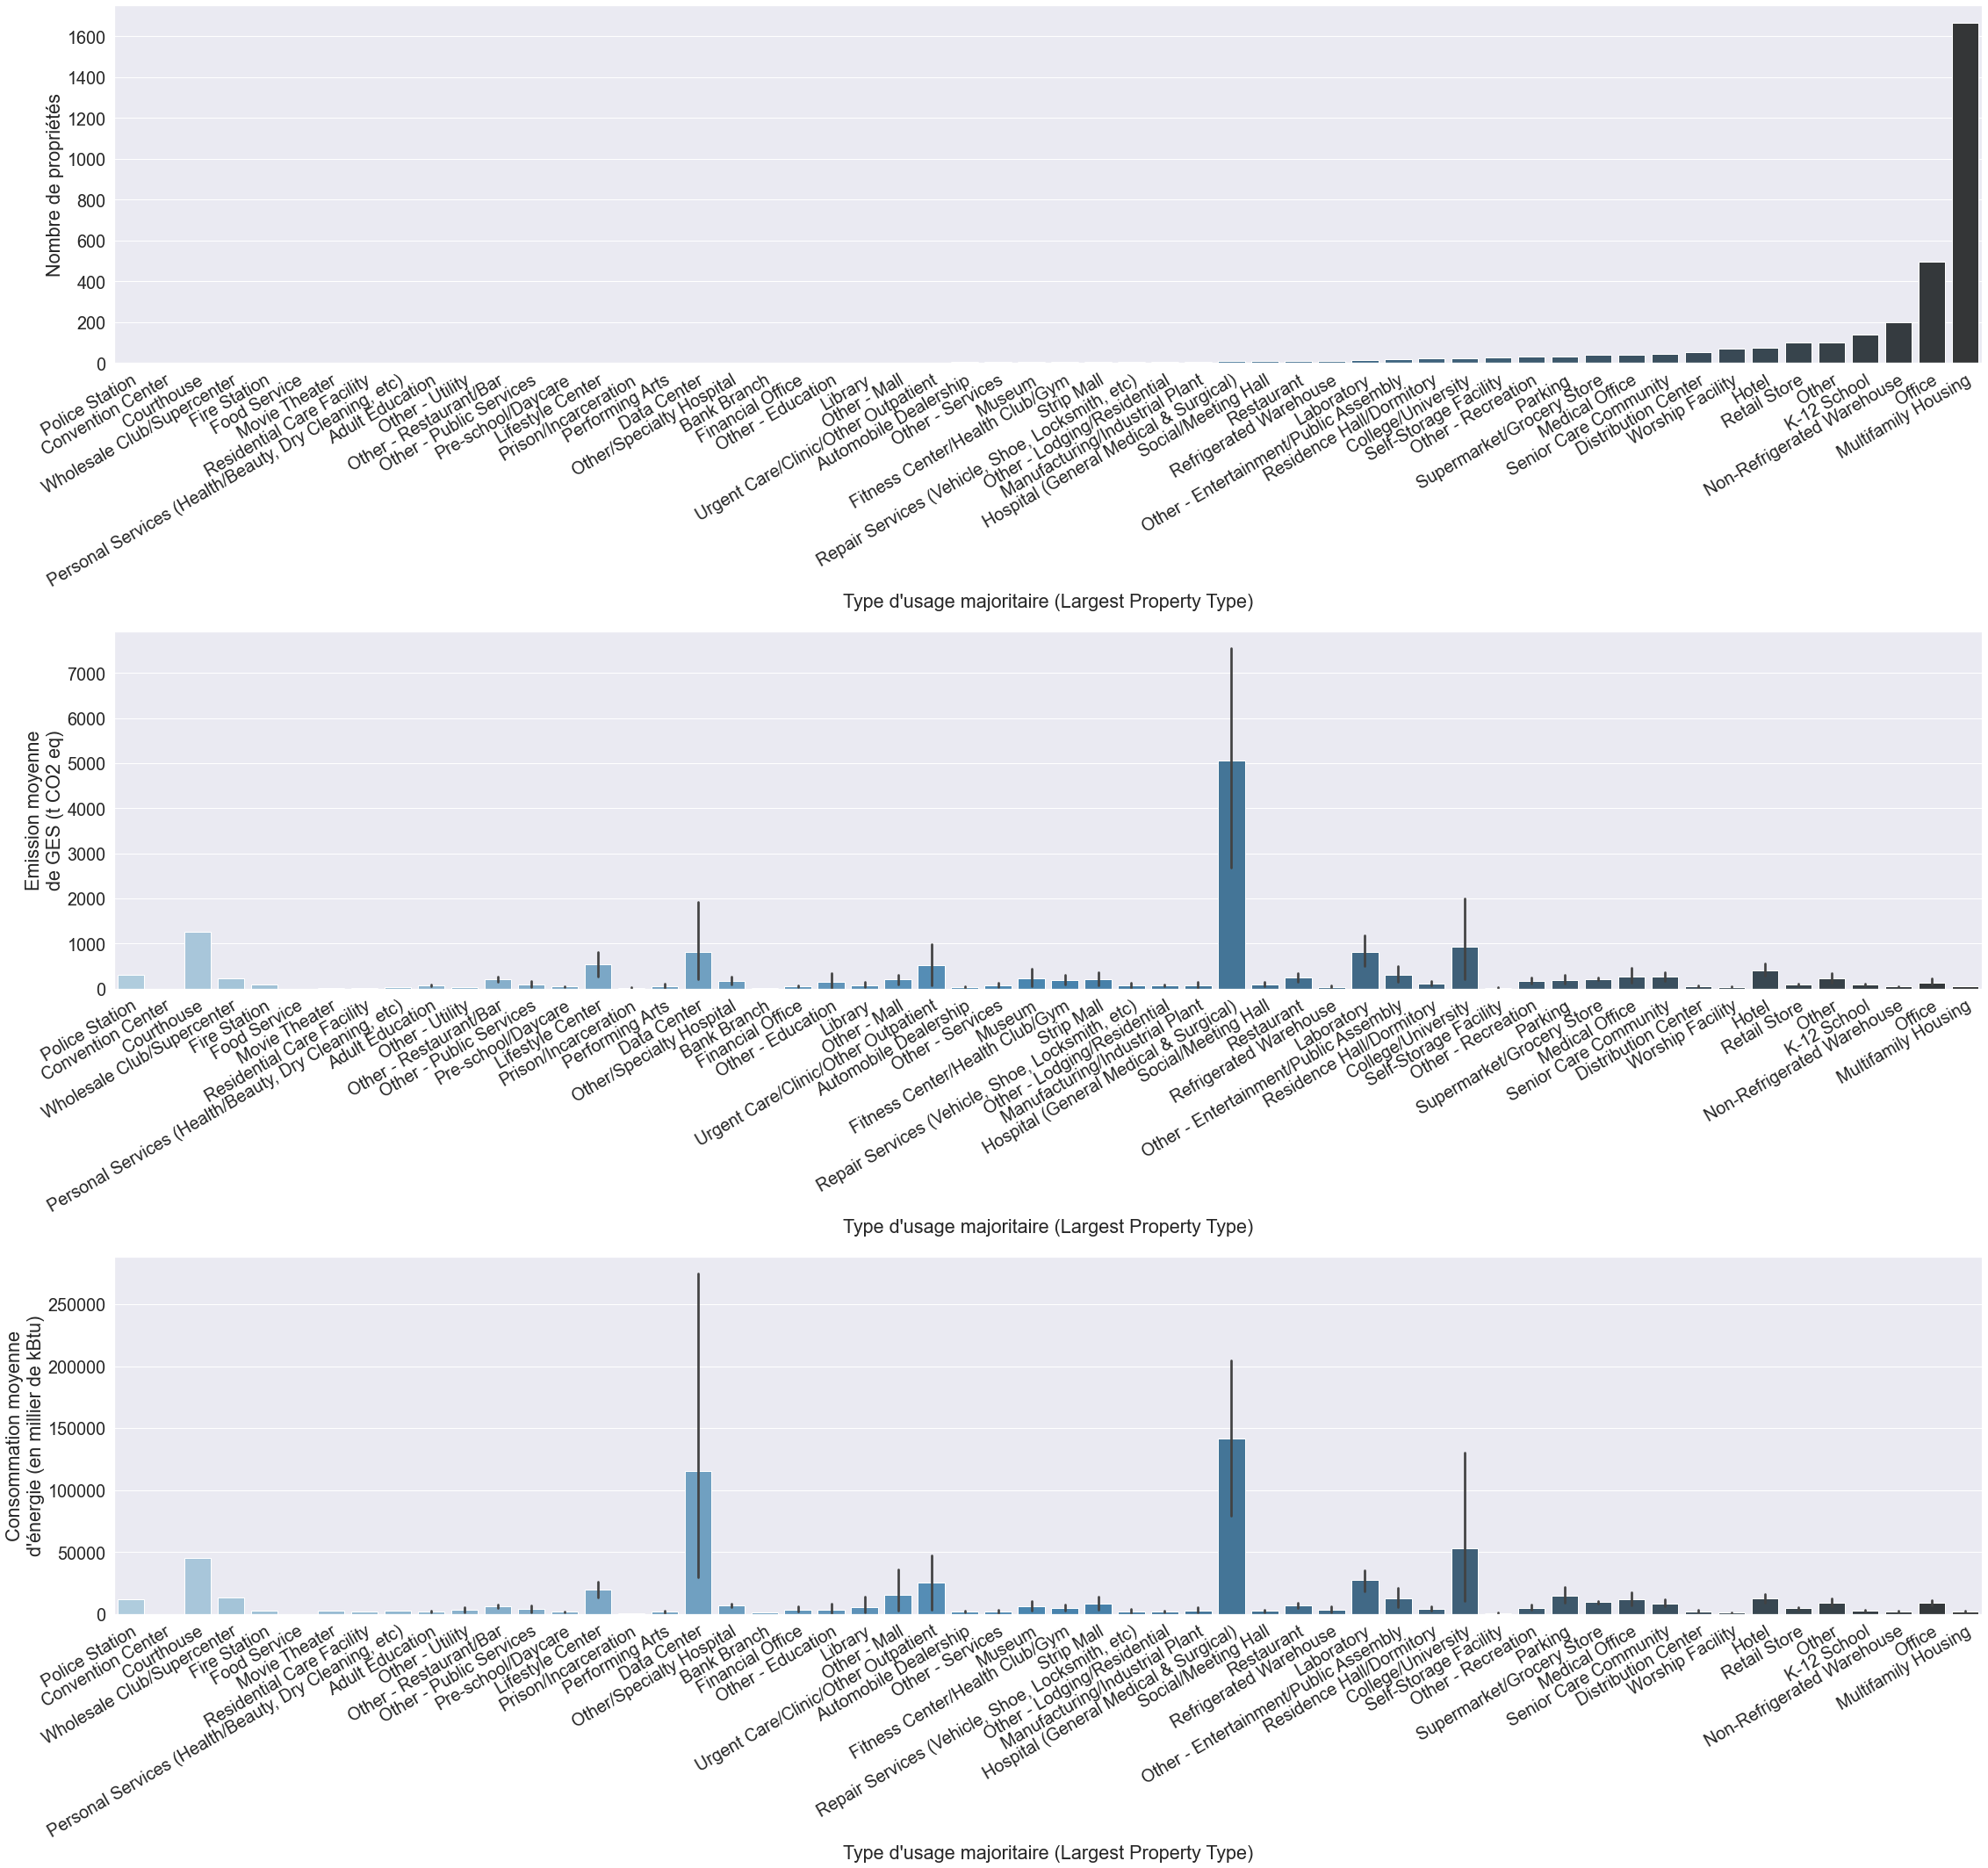

In [9]:
### Largest Use Type

sns.set(font_scale=1.8)


order = df['LargestPropertyUseType'].groupby(df['LargestPropertyUseType']).count().sort_values().index


fig, axes = plt.subplots(nrows= 3,figsize=(32, 30))

sns.barplot(x=df['LargestPropertyUseType'].groupby(df['LargestPropertyUseType']).count().sort_values().index,
            y=df['LargestPropertyUseType'].groupby(df['LargestPropertyUseType']).count().sort_values(),
            palette="Blues_d",
              ax=axes[0]
                 )

sns.barplot(x=df['LargestPropertyUseType'],
                 y=df['TotalGHGEmissions'],
                 order=order,
                 data=df,
                 palette="Blues_d",
                 ax=axes[1])

sns.barplot(x=df['LargestPropertyUseType'],
                y=df['SiteEnergyUse(kBtu)']/1000,
                order=order,
                data=df,
                palette="Blues_d",
                ax=axes[2])


    
for i in range (3):
    axes[i].set_xlabel("Type d'usage majoritaire (Largest Property Type)")  
    axes[i].set_xticklabels( axes[i].get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor' )

axes[0].set_ylabel("Nombre de propriétés")
axes[1].set_ylabel("Emission moyenne""\n""de GES (t CO2 eq)")
axes[2].set_ylabel("Consommation moyenne""\n""d'énergie (en millier de kBtu)")

plt.tight_layout()
plt.show()

### B - Usage Primaire (Primary Use Type)

In [10]:
# L'utilisation Primaire reprend globalement l'information de l'utilisation majoritaire réunie en groupes plus synthétiques

In [11]:
print(df['PrimaryPropertyType'].sort_values().unique())

['Distribution Center' 'High-Rise Multifamily' 'Hospital' 'Hotel'
 'K-12 School' 'Laboratory' 'Large Office' 'Low-Rise Multifamily'
 'Medical Office' 'Mid-Rise Multifamily' 'Mixed Use Property' 'Office'
 'Other' 'Refrigerated Warehouse' 'Residence Hall' 'Restaurant'
 'Retail Store' 'Self-Storage Facility' 'Senior Care Community'
 'Small- and Mid-Sized Office' 'Supermarket / Grocery Store' 'University'
 'Warehouse' 'Worship Facility']


In [12]:
df['PrimaryPropertyType'].groupby(df['PrimaryPropertyType']).count().sort_values()

PrimaryPropertyType
Office                           3
Hospital                        10
Laboratory                      10
Restaurant                      12
Refrigerated Warehouse          12
Residence Hall                  23
University                      25
Self-Storage Facility           28
Medical Office                  39
Supermarket / Grocery Store     40
Senior Care Community           45
Distribution Center             53
Worship Facility                71
Hotel                           77
Retail Store                    91
High-Rise Multifamily          105
Mixed Use Property             133
K-12 School                    139
Large Office                   173
Warehouse                      187
Other                          256
Small- and Mid-Sized Office    293
Mid-Rise Multifamily           564
Low-Rise Multifamily           987
Name: PrimaryPropertyType, dtype: int64

In [13]:
# Aggrégation des groupes de bureaux
df['PrimaryPropertyType'].replace(['Small- and Mid-Sized Office','Large Office'],'Office', inplace=True)

In [14]:
# L'avantage de la variable "PrimaryPropertyType" est d'avoir des grands groupes de bâtiments. 
# Cependant, certains groupes peuvent être trop hétérogènes (dans leur consommation electrique par exemple), pouvant affecter la modélisation par la suite.
# C'est le cas des Data Center, qui ont une conso. energétique très importante.

# La ligne ci-dessous remplace la valeur PrimaryPropertyTYpe des Data center par Data Center.
df['PrimaryPropertyType'] = np.where(df['LargestPropertyUseType'].str.contains("Data Center", case=False, na=np.nan) == True,"Data Center", df['PrimaryPropertyType'])


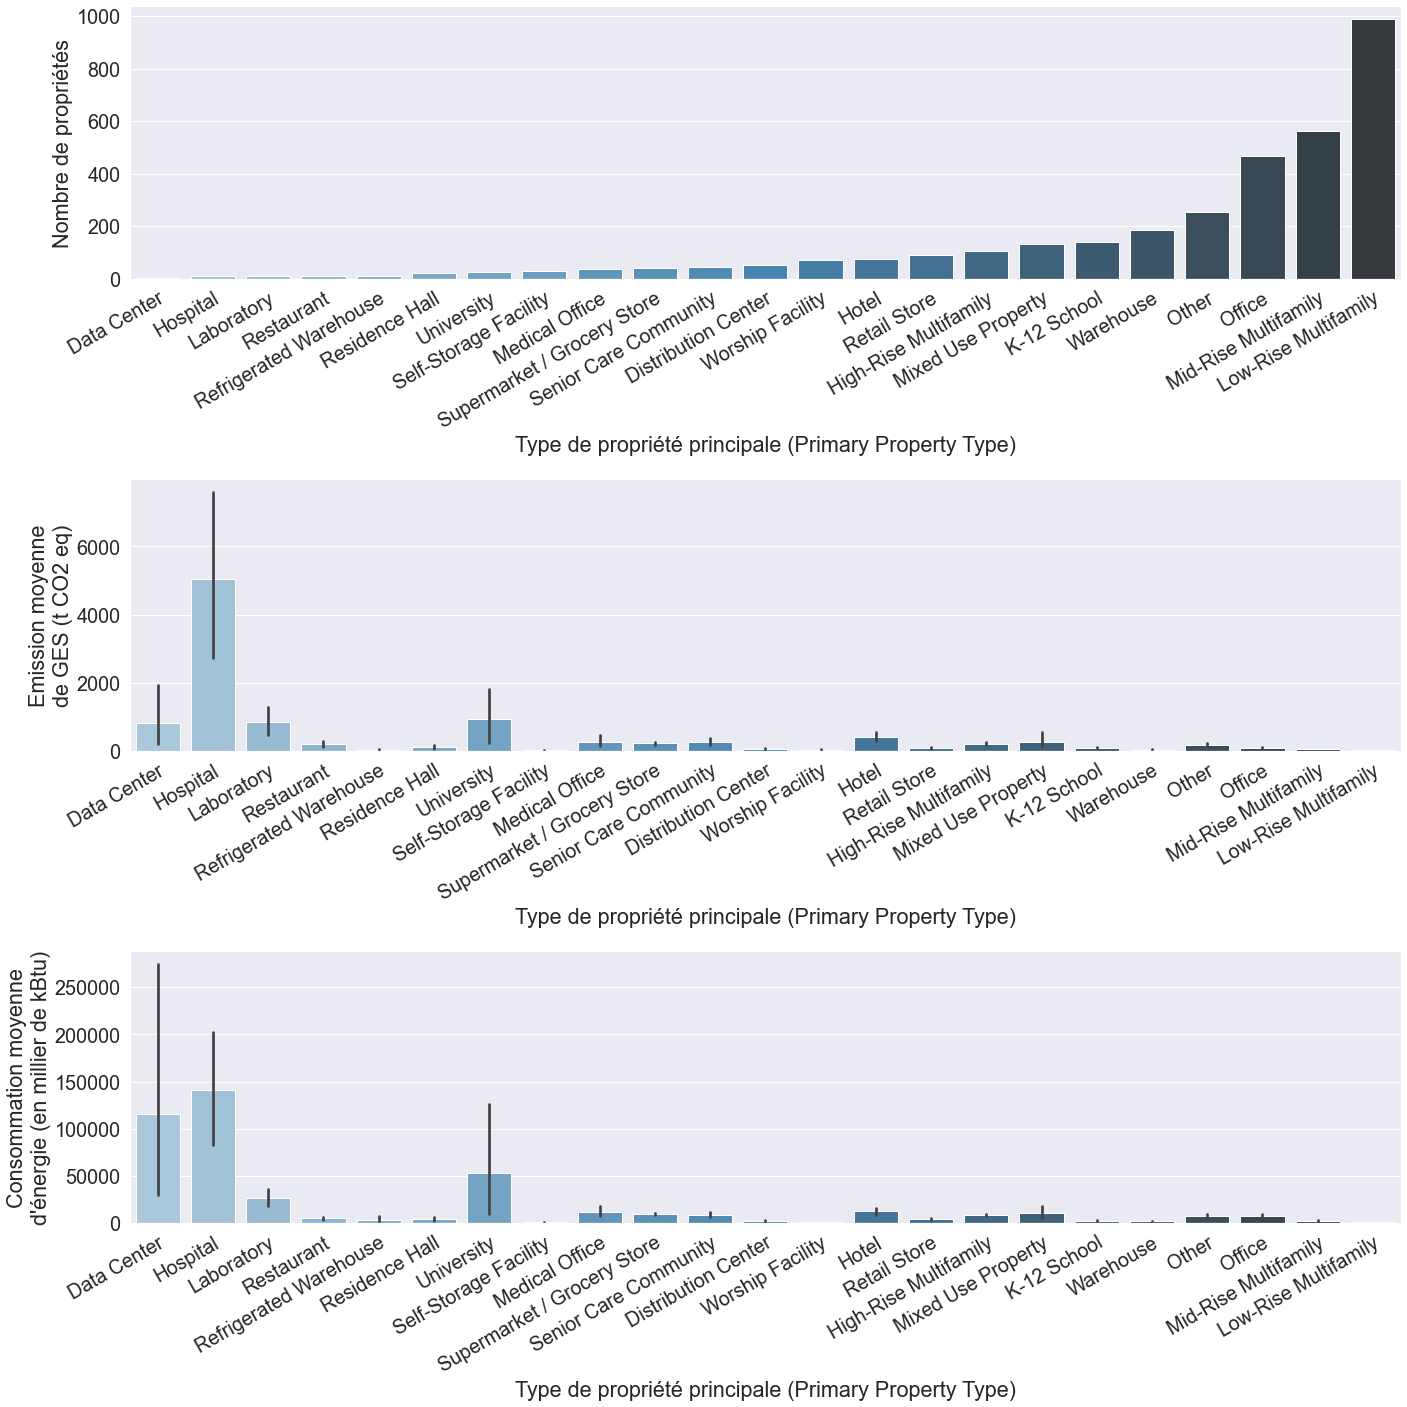

In [15]:
sns.set(font_scale=1.8)


order_P = df['PrimaryPropertyType'].groupby(df['PrimaryPropertyType']).count().sort_values().index


fig, axes = plt.subplots(nrows= 3,figsize=(20, 20))

sns.barplot(x=df['PrimaryPropertyType'].groupby(df['PrimaryPropertyType']).count().sort_values().index,
            y=df['PrimaryPropertyType'].groupby(df['PrimaryPropertyType']).count().sort_values(),
              ax=axes[0],
              palette="Blues_d"
            )

sns.barplot(x=df['PrimaryPropertyType'],
                 y=df['TotalGHGEmissions'],
                 order=order_P,
                 data=df,palette="Blues_d",
                 ax=axes[1])

sns.barplot(x=df['PrimaryPropertyType'],
                y=df['SiteEnergyUse(kBtu)']/1000,
                order=order_P,
                data=df,palette="Blues_d",
                ax=axes[2])


    
for i in range (3):
    axes[i].set_xlabel('Type de propriété principale (Primary Property Type)')  
    axes[i].set_xticklabels( axes[i].get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor' )

axes[0].set_ylabel("Nombre de propriétés")
axes[1].set_ylabel("Emission moyenne""\n""de GES (t CO2 eq)")
axes[2].set_ylabel("Consommation moyenne""\n""d'énergie (en millier de kBtu)")

plt.tight_layout()
plt.show()

In [16]:
# Création d'une colonne Residential qui recense si le bâtiment est résidentielle ou non
df['Residential']=(df['BuildingType'].str.contains("family", case=False, na=np.nan) | df['PrimaryPropertyType'].str.contains("family", case=False, na=np.nan))*1

# <a name="C4">  III- Analyse des indicateurs Géographiques </a>

### A - Quartier (Neighborhood)             


In [17]:
df['Neighborhood'].groupby(df['Neighborhood']).count().sort_values()

Neighborhood
DELRIDGE NEIGHBORHOODS      1
Delridge                    4
Ballard                     7
Northwest                  11
Central                    27
North                      42
DELRIDGE                   80
SOUTHEAST                  95
CENTRAL                   107
BALLARD                   126
NORTH                     145
SOUTHWEST                 166
NORTHWEST                 210
LAKE UNION                251
NORTHEAST                 280
GREATER DUWAMISH          375
MAGNOLIA / QUEEN ANNE     423
EAST                      453
DOWNTOWN                  573
Name: Neighborhood, dtype: int64

In [18]:
# Il y a un mélange de différentes formes typographique (Casses) pour les différents quartiers

df['Neighborhood'] = df['Neighborhood'].str.upper() 

In [19]:
# Remplacement de DELRIDGE NEIGHBORHOODS par DELRIDGE
df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS','DELRIDGE', inplace=True)
df['Neighborhood'].groupby(df['Neighborhood']).count().sort_values()

Neighborhood
DELRIDGE                  85
SOUTHEAST                 95
BALLARD                  133
CENTRAL                  134
SOUTHWEST                166
NORTH                    187
NORTHWEST                221
LAKE UNION               251
NORTHEAST                280
GREATER DUWAMISH         375
MAGNOLIA / QUEEN ANNE    423
EAST                     453
DOWNTOWN                 573
Name: Neighborhood, dtype: int64

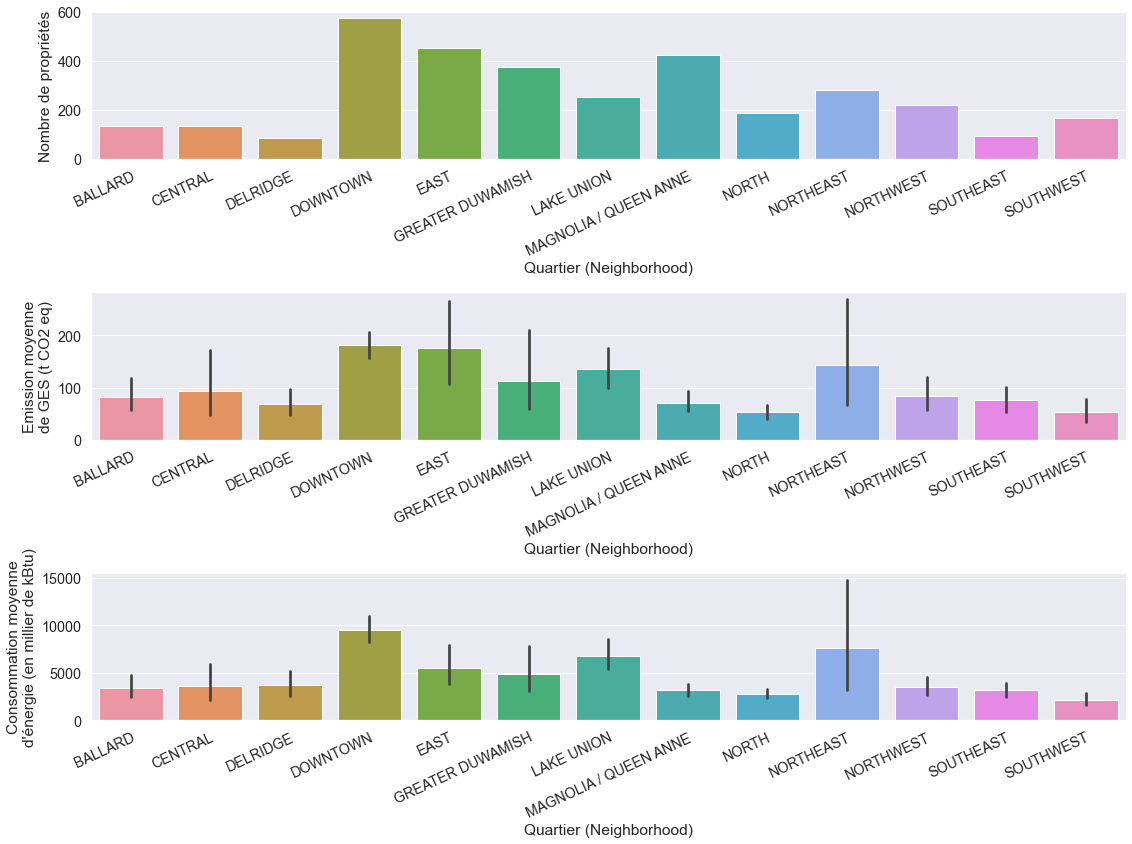

In [20]:
# Représentations graphiques de nombre de propriétés, la conso moyenne et les émissions de GES moyennes par quartier

sns.set(font_scale=1.3)


order_N = df['Neighborhood'].groupby(df['Neighborhood']).count().index


fig, axes = plt.subplots(nrows= 3,figsize=(16, 12))

sns.barplot(x=df['Neighborhood'].groupby(df['Neighborhood']).count().index,
                 y=df['Neighborhood'].groupby(df['Neighborhood']).count(),
                 ax=axes[0]
                 #palette="Blues_d",
                 #data=df
                 )

sns.barplot(x=df['Neighborhood'],
                 y=df['TotalGHGEmissions'],
                #palette="Blues_d",
                 order=order_N,
                 data=df,
                 ax=axes[1])

sns.barplot(x=df['Neighborhood'],
                y=df['SiteEnergyUse(kBtu)']/1000,
                #palette="Blues_d",
                order=order_N,
                data=df,
                ax=axes[2])


    
for i in range (3):
    axes[i].set_xticklabels( axes[i].get_xticklabels(), rotation=25, ha='right', rotation_mode='anchor' )
    axes[i].set_xlabel('Quartier (Neighborhood)')

axes[0].set_ylabel("Nombre de propriétés")
axes[1].set_ylabel("Emission moyenne""\n""de GES (t CO2 eq)")
axes[2].set_ylabel("Consommation moyenne""\n""d'énergie (en millier de kBtu)")

plt.tight_layout()
plt.show()

### B - District (CouncilDistrictCode)

In [21]:
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].astype(str)

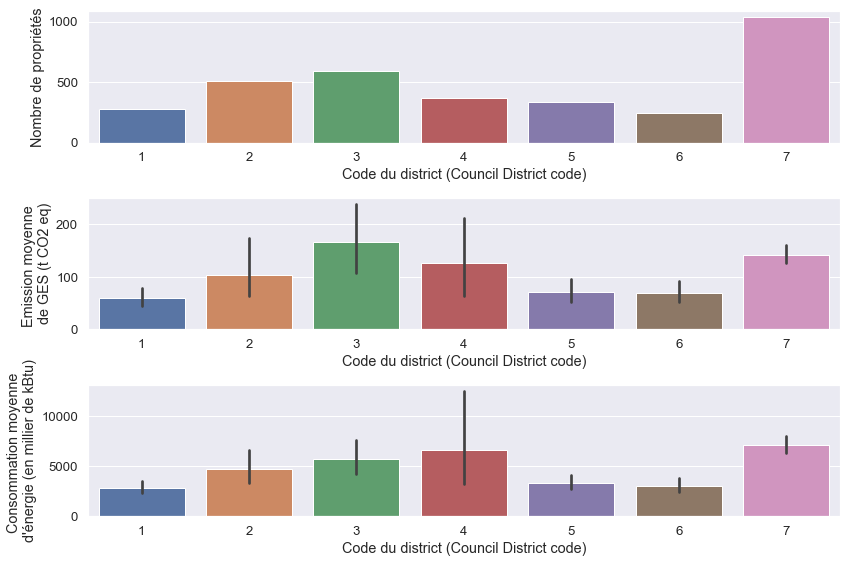

In [22]:
# Représentations graphiques de nombre de propriétés, la conso moyenne et les émissions de GES moyennes par District

sns.set(font_scale=1.2)

order_C = df['CouncilDistrictCode'].groupby(df['CouncilDistrictCode']).count().index

fig, axes = plt.subplots(nrows= 3,figsize=(12, 8))

sns.barplot(x=df['CouncilDistrictCode'].groupby(df['CouncilDistrictCode']).count().index,
                 y=df['CouncilDistrictCode'].groupby(df['CouncilDistrictCode']).count(),
                 ax=axes[0]
                 )

sns.barplot(x=df['CouncilDistrictCode'],
                 y=df['TotalGHGEmissions'],
                 order=order_C,
                 data=df,
                 ax=axes[1])

sns.barplot(x=df['CouncilDistrictCode'],
                y=df['SiteEnergyUse(kBtu)']/1000,
                order=order_C,
                data=df,
                ax=axes[2])

for i in range (3):
    axes[i].set_xlabel('Code du district (Council District code)')

axes[0].set_ylabel("Nombre de propriétés")
axes[1].set_ylabel("Emission moyenne"" \n""de GES (t CO2 eq)")
axes[2].set_ylabel("Consommation moyenne"" \n""d'énergie (en millier de kBtu)")


plt.tight_layout()
plt.show()


### C - Longitude et Latitude

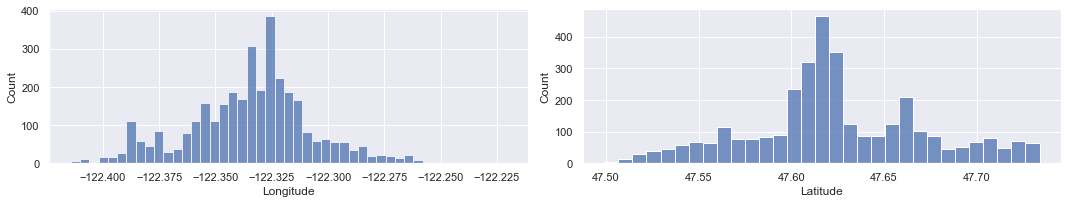

In [23]:
sns.set(font_scale=1)
fig, axes = plt.subplots(ncols = 2,figsize=(15, 3))
g=sns.histplot(df, x="Longitude",cbar=True, 
               #bins=25, 
               ax=axes[0])
g2=sns.histplot(df, x="Latitude",cbar=True,
                #bins=25,
                ax=axes[1])
plt.tight_layout()

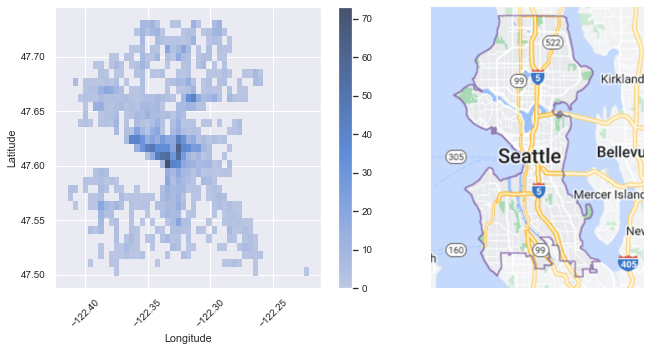

In [24]:
sns.set(font_scale=.9)

fig, axes = plt.subplots(ncols = 2,figsize=(10, 5))

image = plt.imread("Seattle.png")

sns.histplot(df, x="Longitude", y="Latitude",
               #bins=100,
               cbar=True, ax=axes[0] 
             #cbar_kws=dict(shrink=.75)
             )
axes[0].tick_params(axis='x', rotation=45)


axes[1].imshow(image)
axes[1].axis('off')

plt.tight_layout()
plt.show()

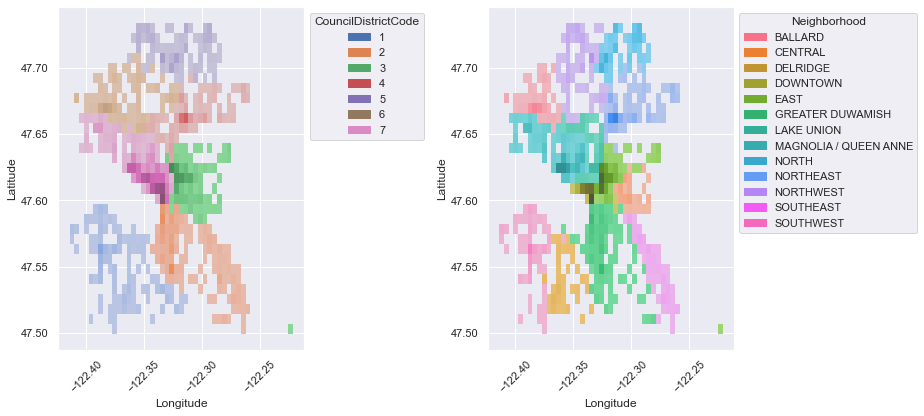

In [25]:
sns.set(font_scale=1)
fig, axes = plt.subplots(ncols = 2,figsize=(13, 6))
g=sns.histplot(df, x="Longitude", y="Latitude",
               hue=df["CouncilDistrictCode"].astype("string"),
               hue_order=order_C,
               label=list(df["CouncilDistrictCode"].astype("string").unique()),
               ax=axes[0])
g2=sns.histplot(df, x="Longitude", y="Latitude",
               hue=df["Neighborhood"].astype("string"),
               hue_order=order_N,
               label=list(df["Neighborhood"].astype("string").unique()),
               ax=axes[1])

sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()

# <a name="C5"> IV- Analyse des Indicateurs Architecturaux </a>

In [26]:
# Création d'une colonne montrant le rapport entre la taille du parking et la taille totale. 
df['Parking_per']=(df['PropertyGFAParking']/df['PropertyGFATotal']).round(3)

# Création d'une colonne montrant le rapport entre la taille d'usage majoritaire et la taille totale. 
df['Largest_UseType_per']=(df['LargestPropertyUseTypeGFA']/df['PropertyGFATotal']).round(3)

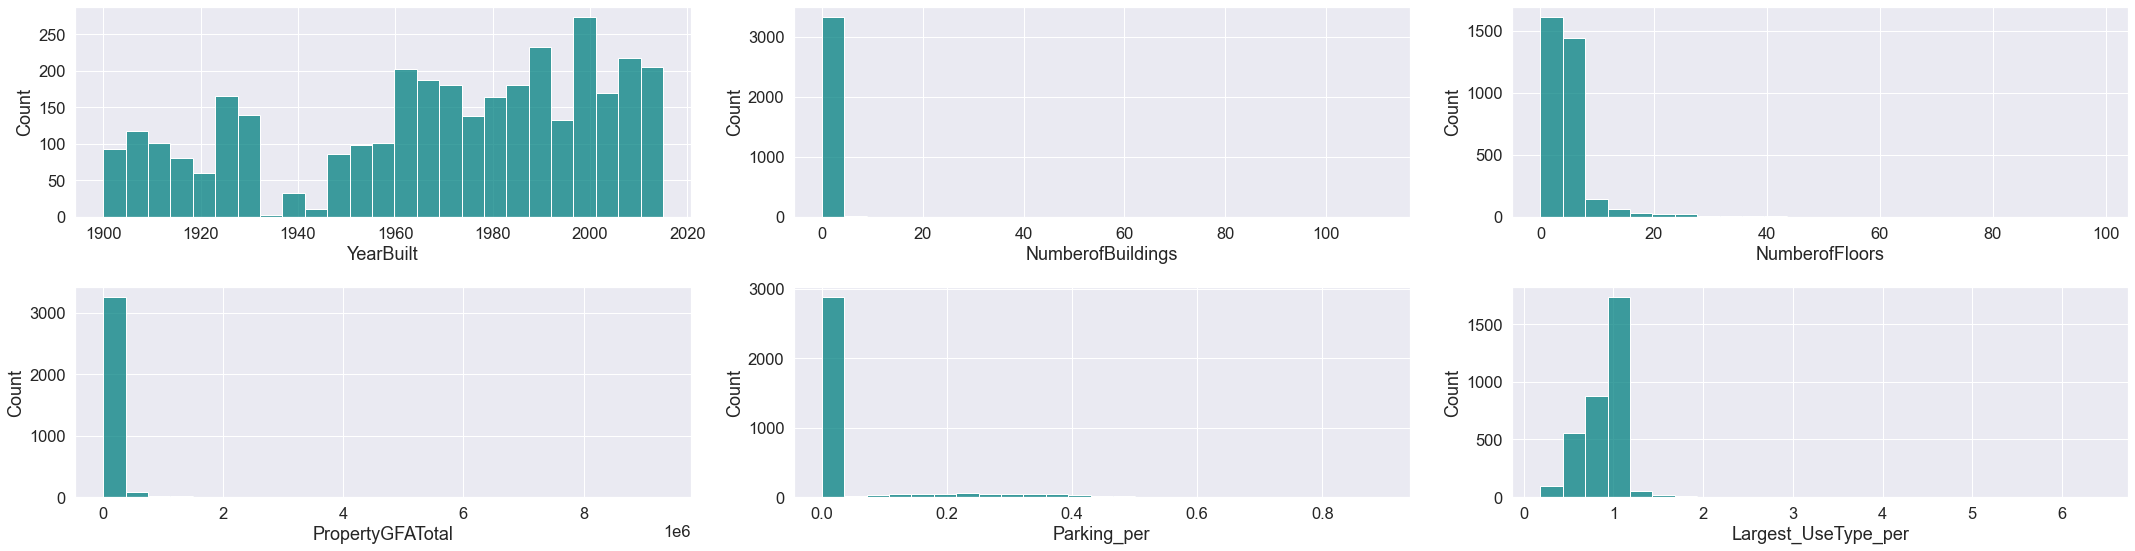

In [27]:
# Répartition empirique des indicateurs architecturaux 
lst_variables = ['YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','Parking_per','Largest_UseType_per']

n=len(lst_variables)

sns.set(font_scale=1.5)

plt.figure(figsize=(30,8))

for i in range(n):
    col = lst_variables[i]
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col,
                 bins=25, 
                 color="teal")

plt.tight_layout()

In [28]:
# Le ratio Largest_UseType_per doit être inférieure à 1 (la taille totale de la propriété ne peut etre inferieur à la taille d'usage principale).
# Les ratios > 1 montrent des erreurs dans la mesure de la surface totale. 

df = df[df['Largest_UseType_per'] <= 1]


In [29]:
df[lst_variables].describe()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  3033.000000        3033.000000     3033.000000      3.033000e+03   
mean   1968.209364           1.083416        4.752720      9.498676e+04   
std      33.307861           2.139272        5.550278      2.269132e+05   
min    1900.000000           0.000000        0.000000      1.128500e+04   
25%    1947.000000           1.000000        2.000000      2.818500e+04   
50%    1975.000000           1.000000        4.000000      4.366100e+04   
75%    1997.000000           1.000000        5.000000      9.026600e+04   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       Parking_per  Largest_UseType_per  
count  3033.000000          3033.000000  
mean      0.043426             0.845879  
std       0.115438             0.185005  
min       0.000000             0.186000  
25%       0.000000             0.719000  
50%       0.000000             0.929000  
75%       0.000000             1.000000  
max       0.798000             1.000000

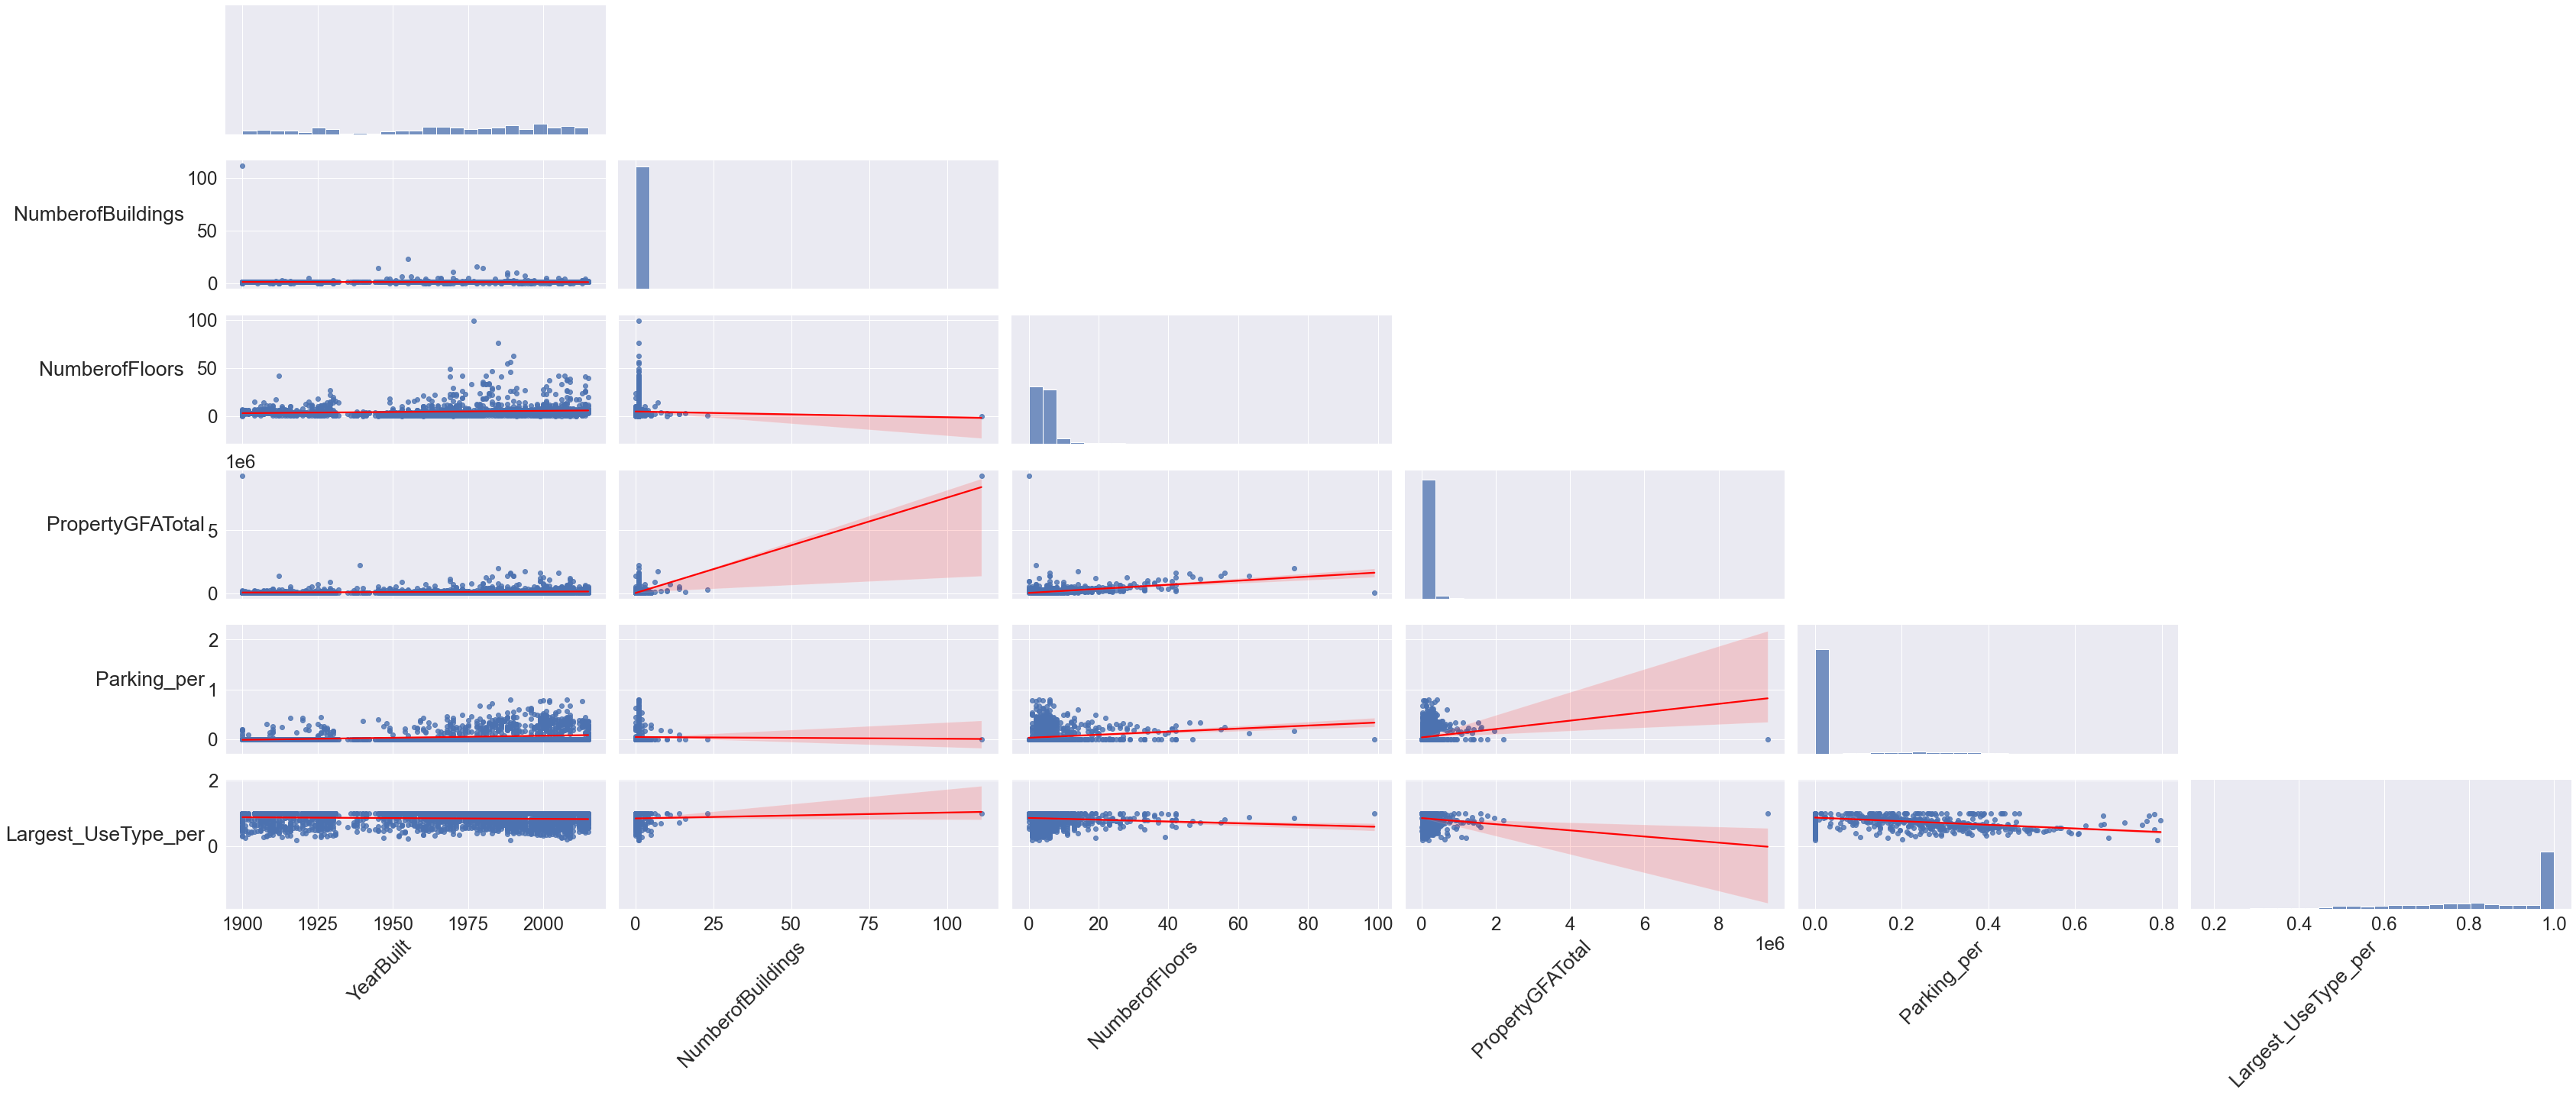

In [30]:
# Analyse de la relation entre les variables architecturales (pairplot)

sns.set(font_scale=2.2)

g = sns.pairplot(df[lst_variables], corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}},
                diag_kind = "hist", diag_kws = {'bins':25},height=3, aspect=2.5)
                
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        ax.xaxis.get_label().set_horizontalalignment('right')

In [31]:
df[(df['NumberofBuildings'] == 111) | (df['NumberofFloors'] == 99)].T

1359  \
OSEBuildingID                                             21611   
BuildingType                                     NonResidential   
PrimaryPropertyType                            Worship Facility   
PropertyName                     Seattle Chinese Baptist Church   
Address                                5801 Beacon Avenue South   
ZipCode                                                 98108.0   
TaxParcelIdentificationNumber                        2124049098   
CouncilDistrictCode                                           2   
Neighborhood                                   GREATER DUWAMISH   
Latitude                                               47.55072   
Longitude                                            -122.30265   
YearBuilt                                                  1977   
NumberofBuildings                                           1.0   
NumberofFloors                                               99   
PropertyGFATotal                                          21948   
PropertyGFAParking                                            0   
PropertyGFABuilding(s)                                    21948   
ListOfAllPropertyUseTypes                      Worship Facility   
LargestPropertyUseType                         Worship Facility   
LargestPropertyUseTypeGFA                               21948.0   
SecondLargestPropertyUseType                                NaN   
SecondLargestPropertyUseTypeGFA                             NaN   
ThirdLargestPropertyUseType                                 NaN   
ThirdLargestPropertyUseTypeGFA                              NaN   
YearsENERGYSTARCertified                                    NaN   
ENERGYSTARScore                                            80.0   
SiteEUI(kBtu/sf)                                           14.9   
SiteEUIWN(kBtu/sf)                                         14.9   
SourceEUI(kBtu/sf)                                    46.599998   
SourceEUIWN(kBtu/sf)                                  46.599998   
SiteEnergyUse(kBtu)                                 326001.1875   
SiteEnergyUseWN(kBtu)                               326001.1875   
SteamUse(kBtu)                                              0.0   
Electricity(kWh)                                        95545.5   
Electricity(kBtu)                                      326001.0   
NaturalGas(therms)                                          0.0   
NaturalGas(kBtu)                                            0.0   
DefaultData                                               False   
Comments                                                    NaN   
ComplianceStatus                                      Compliant   
Outlier                                                     NaN   
TotalGHGEmissions                                          2.27   
GHGEmissionsIntensity                                       0.1   
Residential                                                   0   
Parking_per                                                 0.0   
Largest_UseType_per                                         1.0   

                                                                      3274  
OSEBuildingID                                                        49967  
BuildingType                                                        Campus  
PrimaryPropertyType                                             University  
PropertyName                     University of Washington - Seattle Campus  
Address                                          NE 45th St & Brooklyn Ave  
ZipCode                                                            98105.0  
TaxParcelIdentificationNumber                                   1625049001  
CouncilDistrictCode                                                      4  
Neighborhood                                                     NORTHEAST  
Latitude                                                          47.65644  
Longitude                                                     

In [32]:
# On relève 2 outliers. Ces deux propriétés seront retirés afin de ne pas impacter la modélisation par la suite. 

df[(df['NumberofBuildings'] == 111) | (df['NumberofFloors'] == 99)].T

df = df[(df['NumberofBuildings'] < 111) & (df['NumberofFloors'] < 99)]

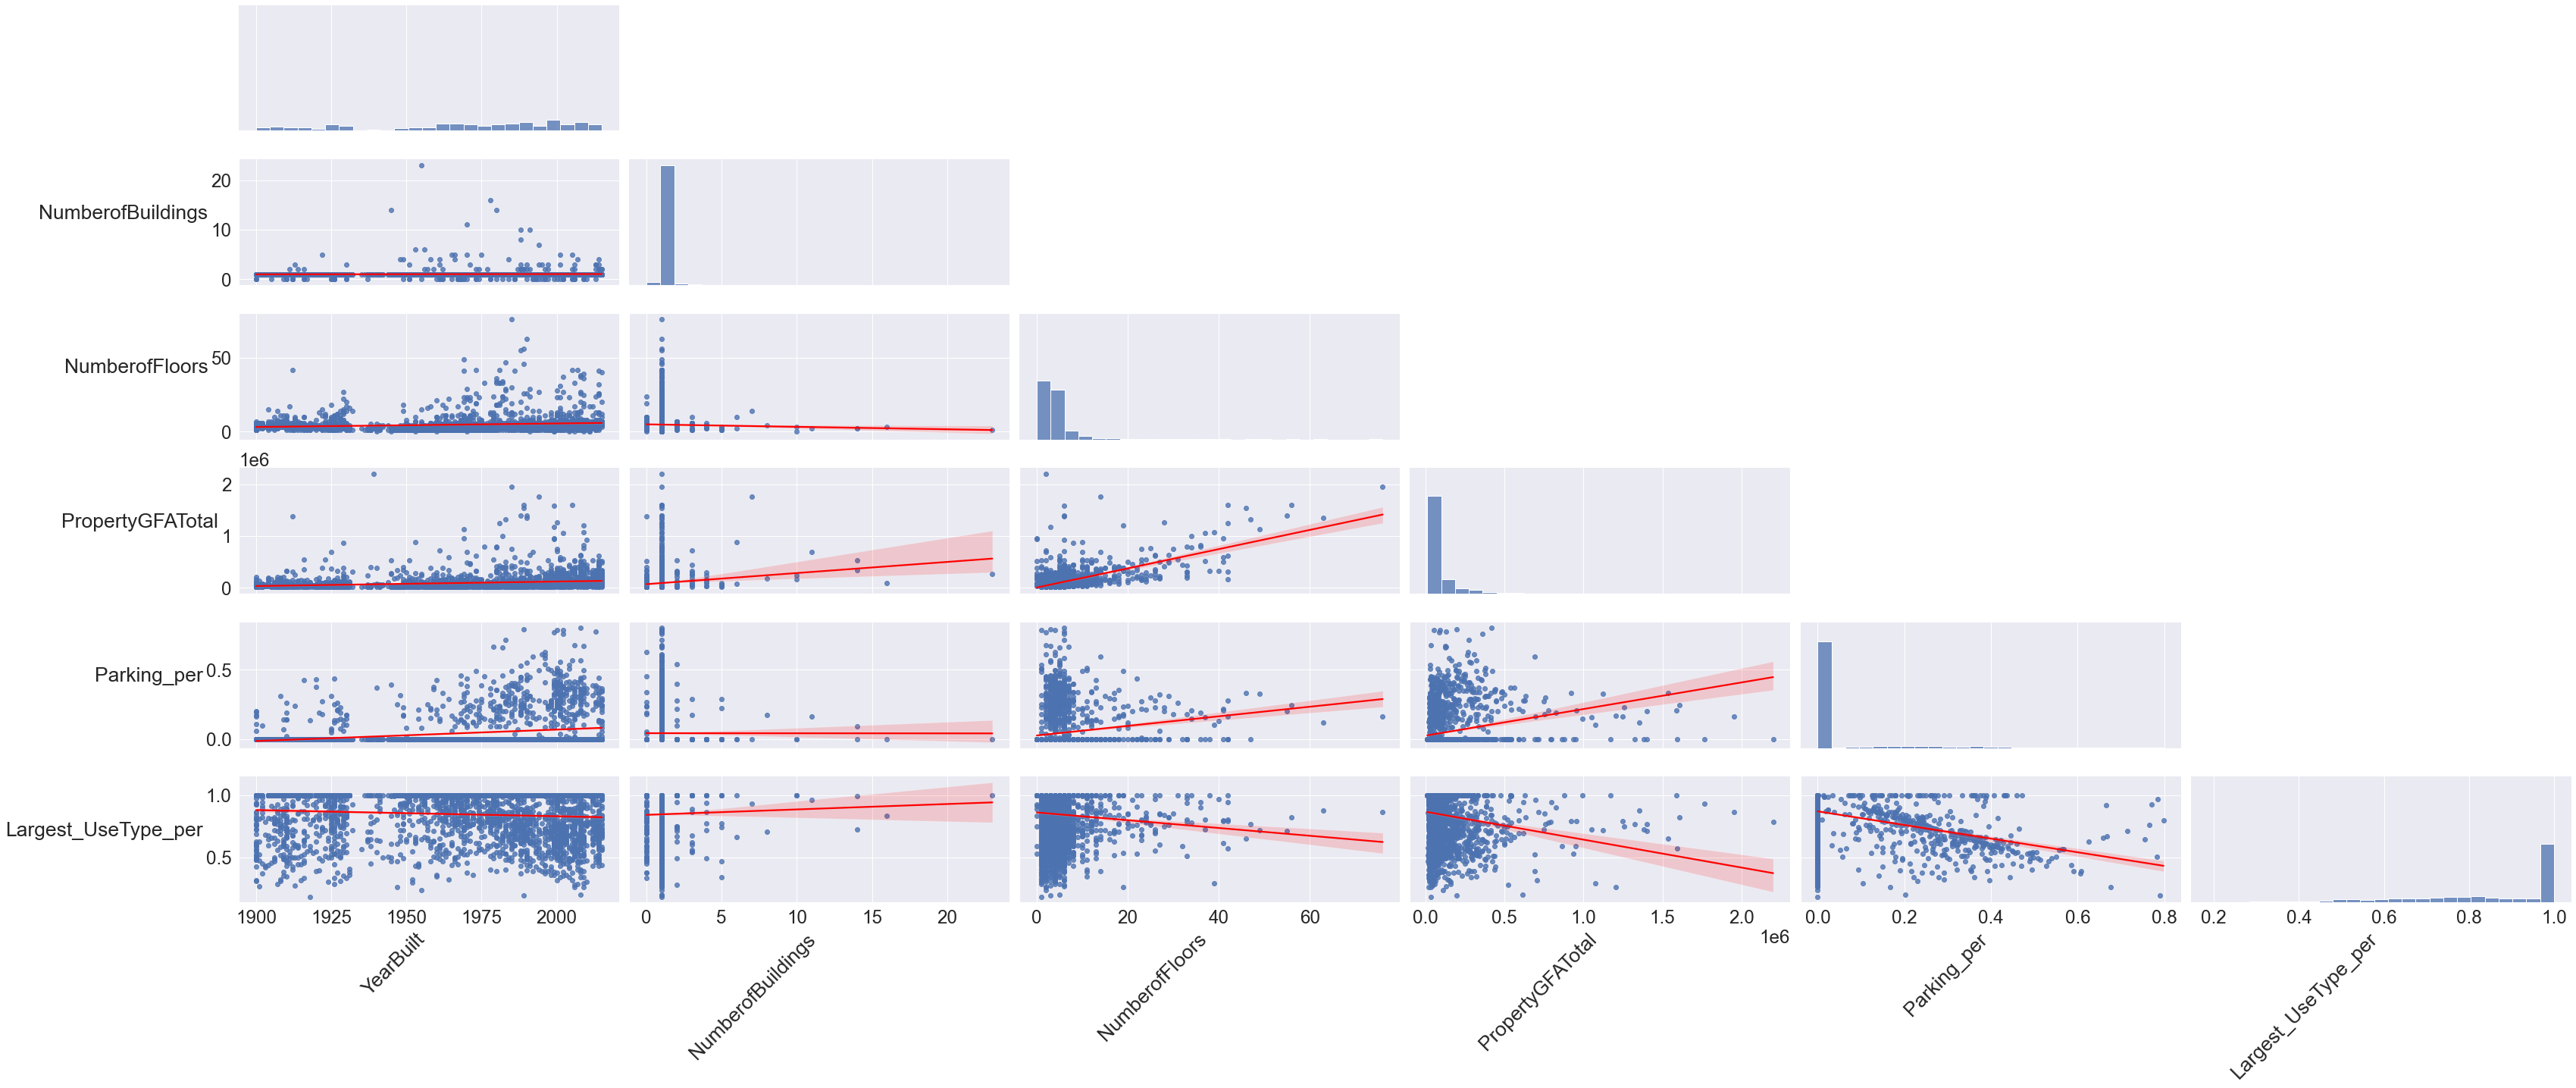

In [33]:
# Analyse de la relation entre les variables (pairplot)

sns.set(font_scale=2.2)

g = sns.pairplot(df[lst_variables], corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}},diag_kind = "hist", diag_kws = {'bins':25},height=3, aspect=2.5)

g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

# <a name="C6"> V-  Analyse des variables à prédire : SiteEnergyUse(kBtu) + TotalGHGEmissions </a>

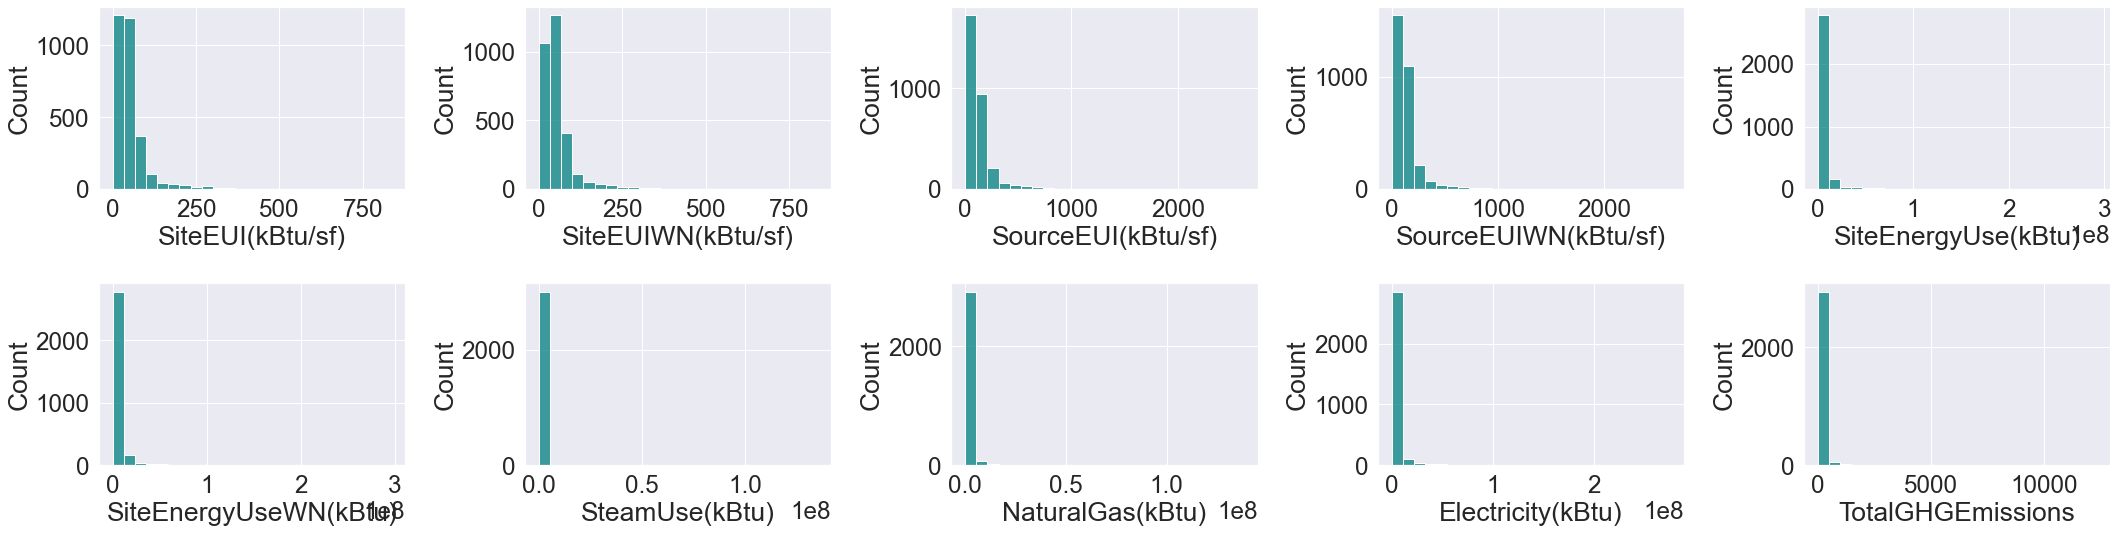

In [34]:
lst_Columns = ['SiteEUI(kBtu/sf)',
               'SiteEUIWN(kBtu/sf)',
               'SourceEUI(kBtu/sf)',
               'SourceEUIWN(kBtu/sf)',
               'SiteEnergyUse(kBtu)',
               'SiteEnergyUseWN(kBtu)',
               'SteamUse(kBtu)',
               'NaturalGas(kBtu)',
               'Electricity(kBtu)',
               'TotalGHGEmissions']

n=len(lst_Columns)

plt.figure(figsize=(30,8))

for i in range(n):
    col = lst_Columns[i]
    ax = plt.subplot(2, 5, i + 1)
    sns.histplot(data=df, x=col,
                 bins=25, 
                 color="teal")

plt.tight_layout()

In [35]:
df[lst_Columns].describe()

SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
count       3029.000000         3030.000000         3031.000000   
mean          54.373589           56.669538          133.877004   
std           55.772220           56.609866          139.772295   
min            0.000000            0.000000            0.000000   
25%           27.900000           29.500000           75.199997   
50%           38.700001           40.850000           96.500000   
75%           60.400002           64.300003          143.800003   
max          834.400024          834.400024         2620.000000   

       SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
count           3031.000000         3.031000e+03           3.030000e+03   
mean             137.526229         4.747369e+06           4.863583e+06   
std              139.600879         1.235179e+07           1.251366e+07   
min               -2.100000         0.000000e+00           0.000000e+00   
25%               79.000000         9.021582e+05           9.457519e+05   
50%              101.400002         1.748630e+06           1.840939e+06   
75%              148.349998         4.047442e+06           4.187696e+06   
max             2620.000000         2.916144e+08           2.959299e+08   

       SteamUse(kBtu)  NaturalGas(kBtu)  Electricity(kBtu)  TotalGHGEmissions  
count    3.031000e+03      3.031000e+03       3.031000e+03        3031.000000  
mean     1.807299e+05      1.190796e+06       3.354410e+06         100.578232  
std      2.713387e+06      4.054512e+06       8.985797e+06         347.479886  
min      0.000000e+00      0.000000e+00      -1.154170e+05          -0.800000  
25%      0.000000e+00      0.000000e+00       6.245510e+05           8.970000  
50%      0.000000e+00      2.922530e+05       1.138176e+06          32.330000  
75%      0.000000e+00      1.128257e+06       2.712380e+06          89.480000  
max      1.349435e+08      1.381912e+08       2.745325e+08       12307.160000

In [36]:
#Retrait des bâtiments qui ont une consommation ou des émissions nuls ou inferieures à 0 (producteurs d'energie)
df[(df['SiteEnergyUseWN(kBtu)'] <= 0) | (df['TotalGHGEmissions'] <= 0)].T

df =df[(df['SiteEnergyUseWN(kBtu)'] > 0) & (df['TotalGHGEmissions'] > 0)]


In [37]:
df[lst_Columns].describe()

SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
count       3007.000000         3007.000000         3007.000000   
mean          54.417725           57.019089          134.283538   
std           55.692125           56.554325          139.784461   
min            0.400000            0.400000            0.000000   
25%           28.000000           29.600000           75.400002   
50%           38.700001           41.000000           96.699997   
75%           60.350000           64.500000          143.800003   
max          834.400024          834.400024         2620.000000   

       SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
count           3007.000000         3.007000e+03           3.007000e+03   
mean             138.624576         4.730148e+06           4.896126e+06   
std              139.612304         1.235174e+07           1.255380e+07   
min                0.000000         1.340900e+04           1.340900e+04   
25%               79.400002         9.091988e+05           9.599902e+05   
50%              102.000000         1.750100e+06           1.851121e+06   
75%              149.050003         4.023323e+06           4.237350e+06   
max             2620.000000         2.916144e+08           2.959299e+08   

       SteamUse(kBtu)  NaturalGas(kBtu)  Electricity(kBtu)  TotalGHGEmissions  
count    3.007000e+03      3.007000e+03       3.007000e+03        3007.000000  
mean     1.775927e+05      1.192457e+06       3.346341e+06         100.368058  
std      2.716662e+06      4.065448e+06       8.994249e+06         348.303105  
min      0.000000e+00      0.000000e+00       0.000000e+00           0.090000  
25%      0.000000e+00      0.000000e+00       6.273430e+05           9.000000  
50%      0.000000e+00      2.961260e+05       1.138176e+06          32.440000  
75%      0.000000e+00      1.129270e+06       2.709962e+06          89.290000  
max      1.349435e+08      1.381912e+08       2.745325e+08       12307.160000

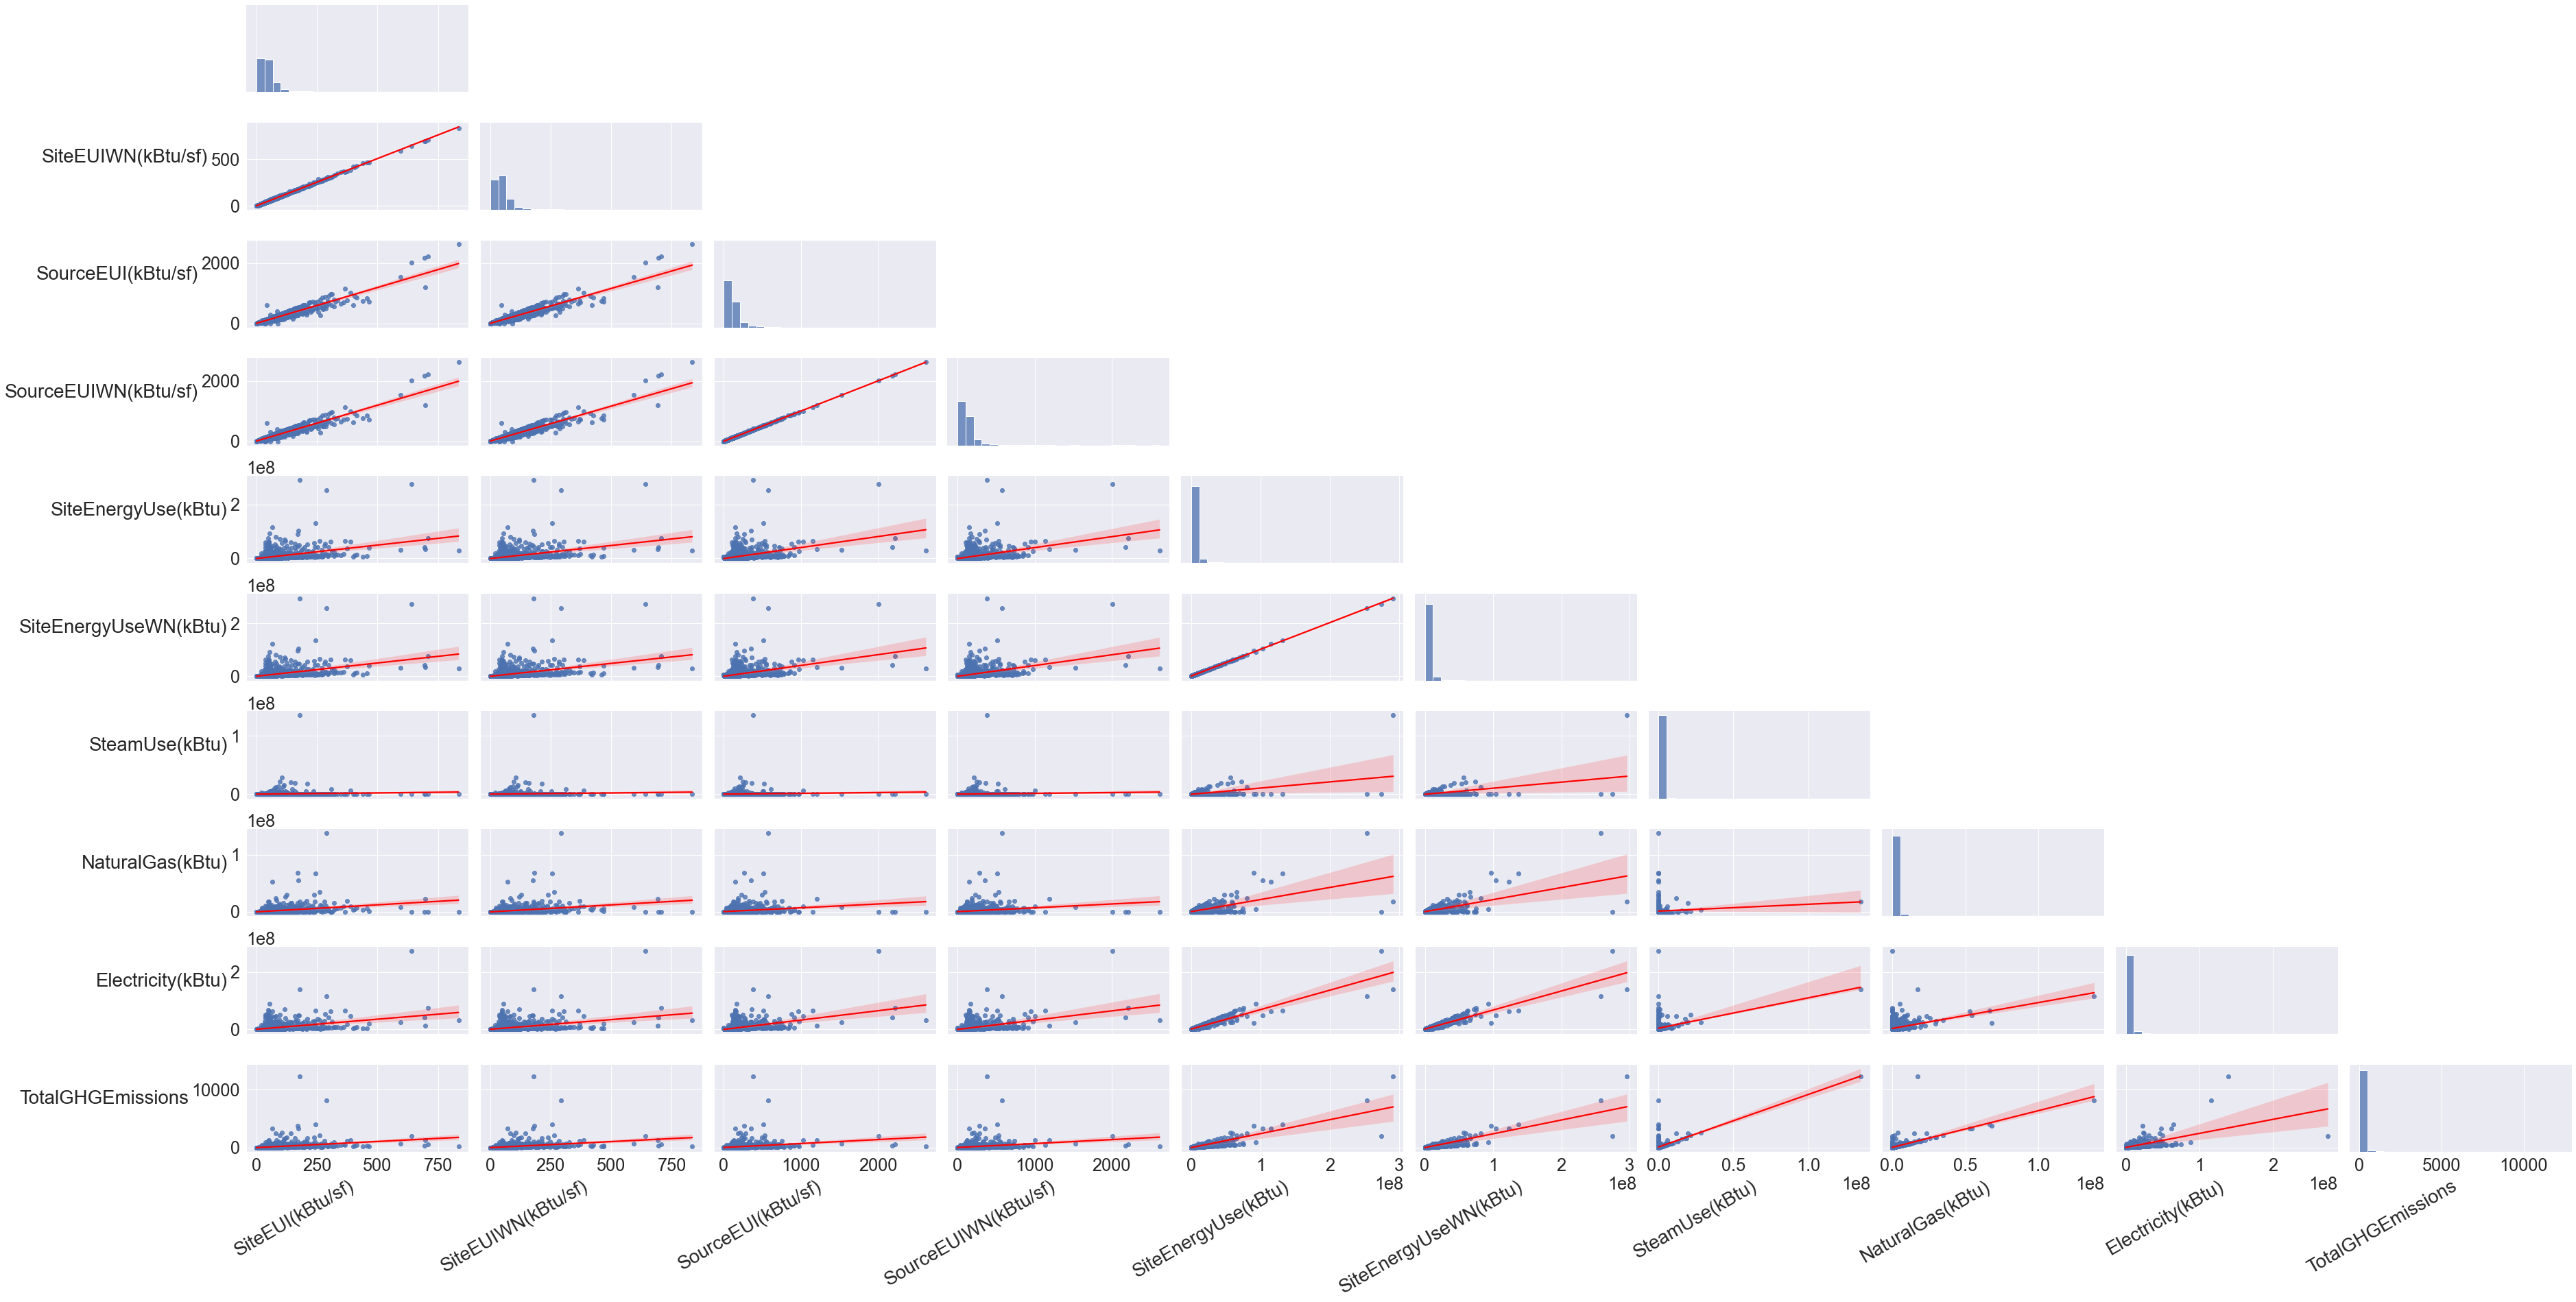

In [38]:
# Analyse de la relation entre les variables (pairplot)

sns.set(font_scale=2.3)

g = sns.pairplot(df[lst_Columns], corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}},
                diag_kind = "hist", diag_kws = {'bins':25},aspect=2)
g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

# <a name="C7"> VI - Création du jeu de données pour la modélisation </a>

In [39]:
lst_variables = ['Longitude','Latitude','PrimaryPropertyType','Neighborhood','Residential',"CouncilDistrictCode",
                 'YearBuilt','Parking_per','Largest_UseType_per','NumberofFloors','NumberofBuildings','PropertyGFATotal',
                 'TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']
                 

df_model = df[[c for c in df.columns if c in lst_variables]].copy()

In [40]:
# Filtre des bâtiments résidentiels
df_model = df_model[df_model['Residential']==0]
df_model.drop('Residential', axis=1, inplace=True)


In [41]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 3375
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PrimaryPropertyType  1432 non-null   object 
 1   CouncilDistrictCode  1432 non-null   object 
 2   Neighborhood         1432 non-null   object 
 3   Latitude             1432 non-null   float64
 4   Longitude            1432 non-null   float64
 5   YearBuilt            1432 non-null   int64  
 6   NumberofBuildings    1432 non-null   float64
 7   NumberofFloors       1432 non-null   int64  
 8   PropertyGFATotal     1432 non-null   int64  
 9   ENERGYSTARScore      941 non-null    float64
 10  SiteEnergyUse(kBtu)  1432 non-null   float64
 11  TotalGHGEmissions    1432 non-null   float64
 12  Parking_per          1432 non-null   float64
 13  Largest_UseType_per  1432 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 167.8+ KB


In [42]:
#retrait des valeurs manquantes

print(df_model.isna().sum())

df_model.dropna(inplace=True)

PrimaryPropertyType      0
CouncilDistrictCode      0
Neighborhood             0
Latitude                 0
Longitude                0
YearBuilt                0
NumberofBuildings        0
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        491
SiteEnergyUse(kBtu)      0
TotalGHGEmissions        0
Parking_per              0
Largest_UseType_per      0
dtype: int64


In [43]:
df_model.shape

(941, 14)

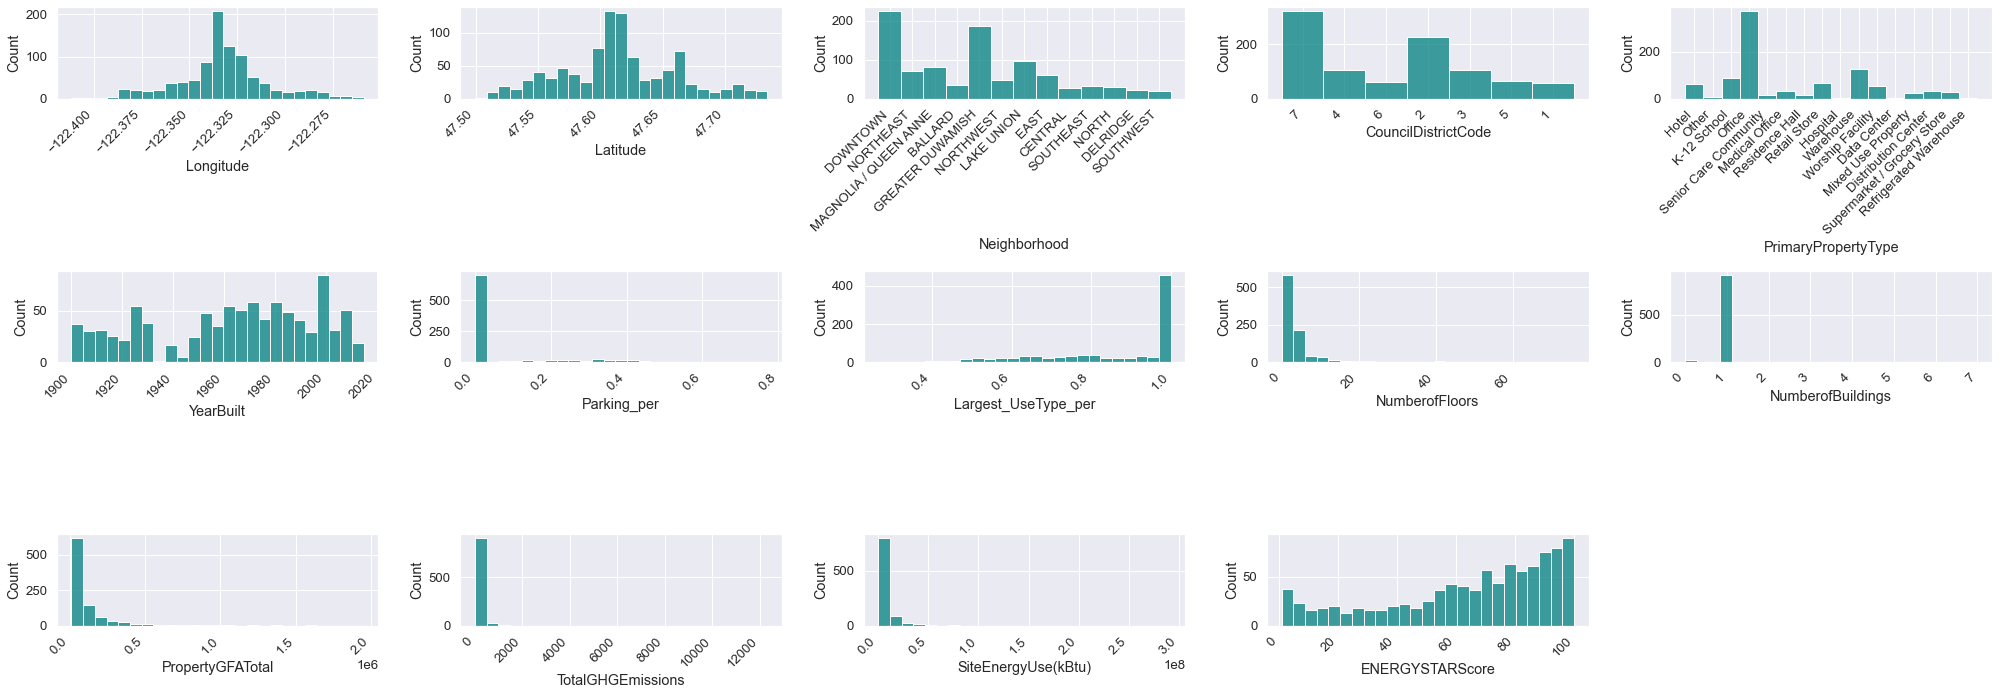

In [44]:
# Répartition empirique des variables selectionnées


lst_variables = ['Longitude','Latitude','Neighborhood',"CouncilDistrictCode",'PrimaryPropertyType',
                 'YearBuilt','Parking_per','Largest_UseType_per','NumberofFloors','NumberofBuildings','PropertyGFATotal',
                 'TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']

n=len(lst_variables)

sns.set(font_scale=1.2)

plt.figure(figsize=(28,20))

for i in range(n):
    col = lst_variables[i]
    ax = plt.subplot(6, 5, i + 1)
    sns.histplot(data=df_model, x=col,
                 bins=25, 
                 color="teal")
    plt.xticks(rotation=45,ha='right')

plt.tight_layout()

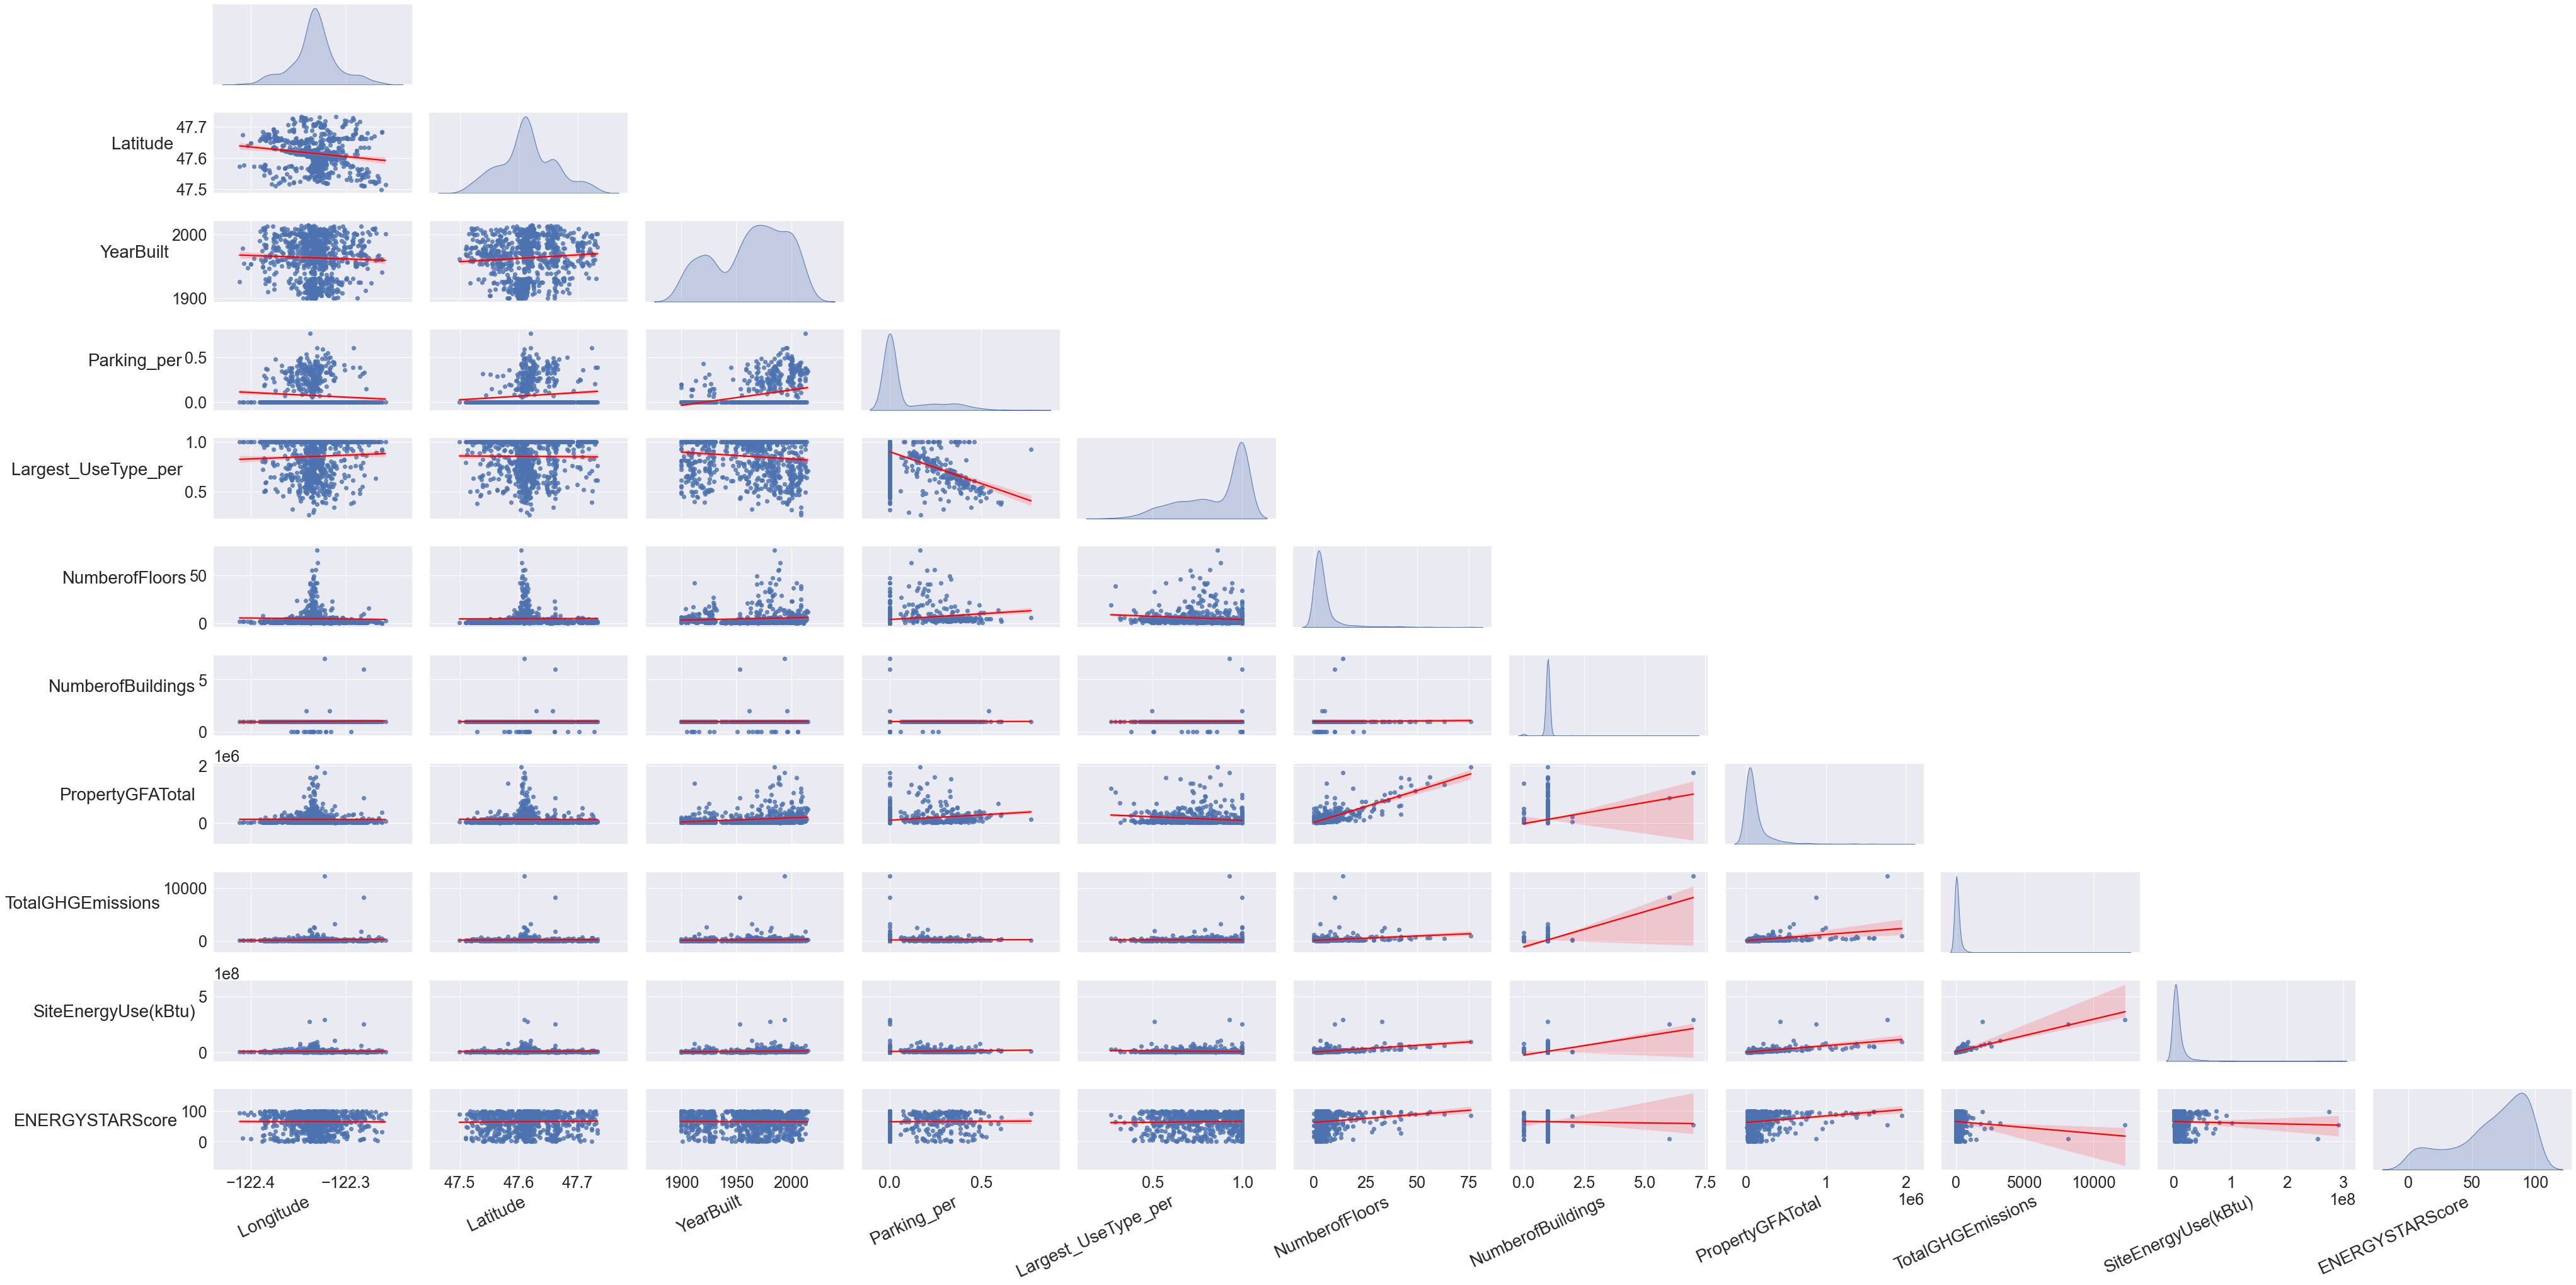

In [45]:
# Analyse de la relation entre les variables (pairplot)

sns.set(font_scale=2.3)

g = sns.pairplot(df_model[lst_variables], corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}},
                diag_kind = "kde", aspect=2)
g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 25)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')
    


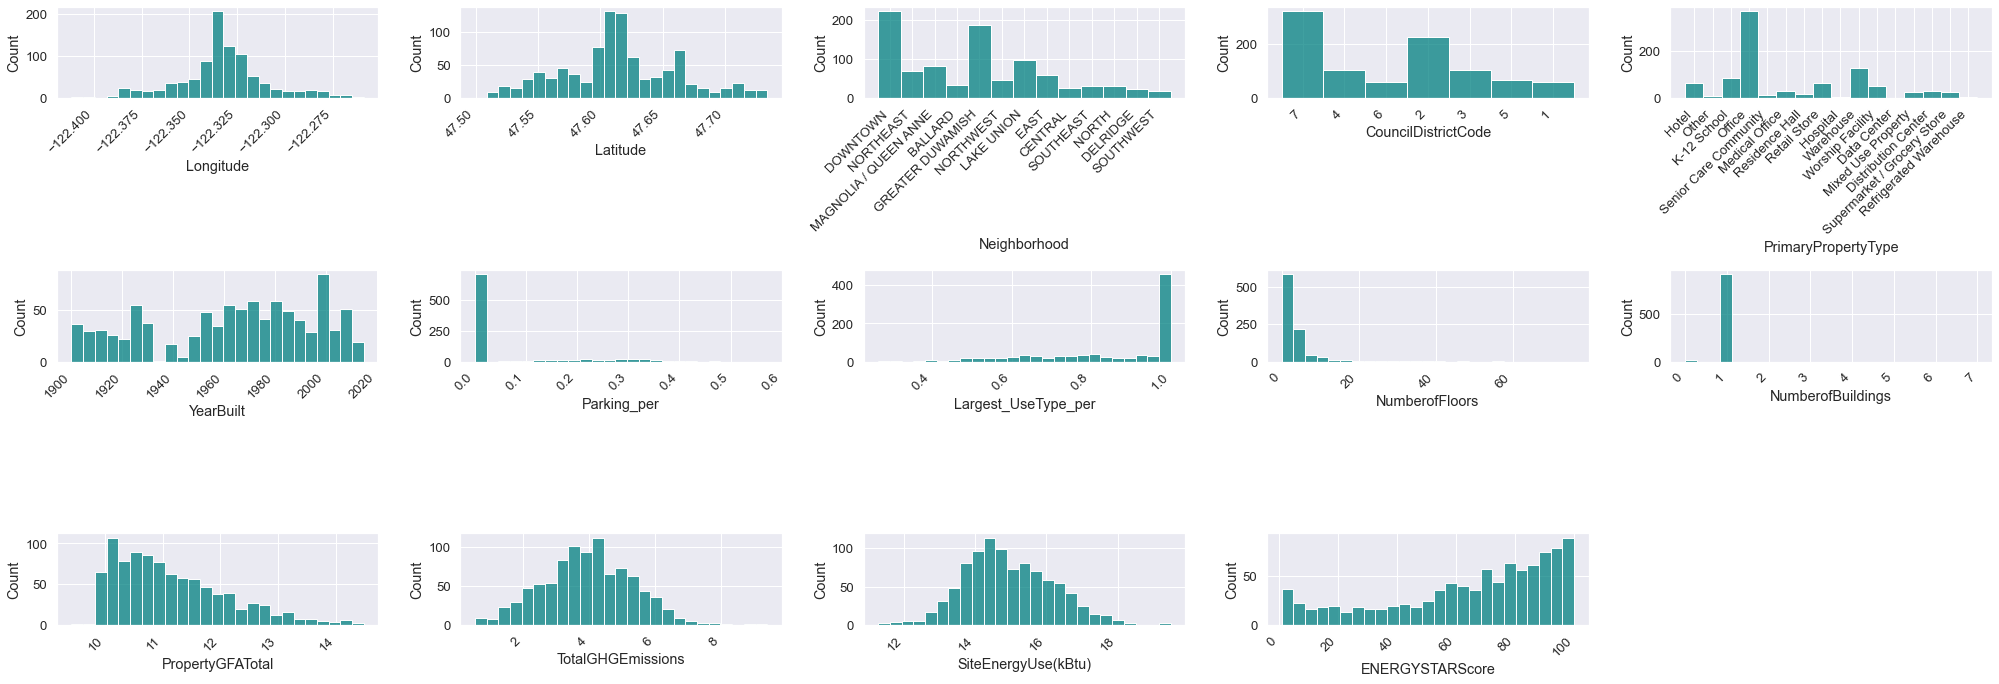

In [46]:
# Transformation de certaines variables numériques en log+1

lst_Columns_fit = ['TotalGHGEmissions','SiteEnergyUse(kBtu)',
                   'Parking_per','PropertyGFATotal'
                   ]

for columns in lst_Columns_fit:
    df_model[columns] = np.log1p(df_model[columns])


sns.set(font_scale=1.2)

plt.figure(figsize=(28,20))

for i in range(n):
    col = lst_variables[i]
    ax = plt.subplot(6, 5, i + 1)
    sns.histplot(data=df_model, x=col,
                 bins=25, 
                 color="teal")
    plt.xticks(rotation=45,ha='right')

plt.tight_layout()

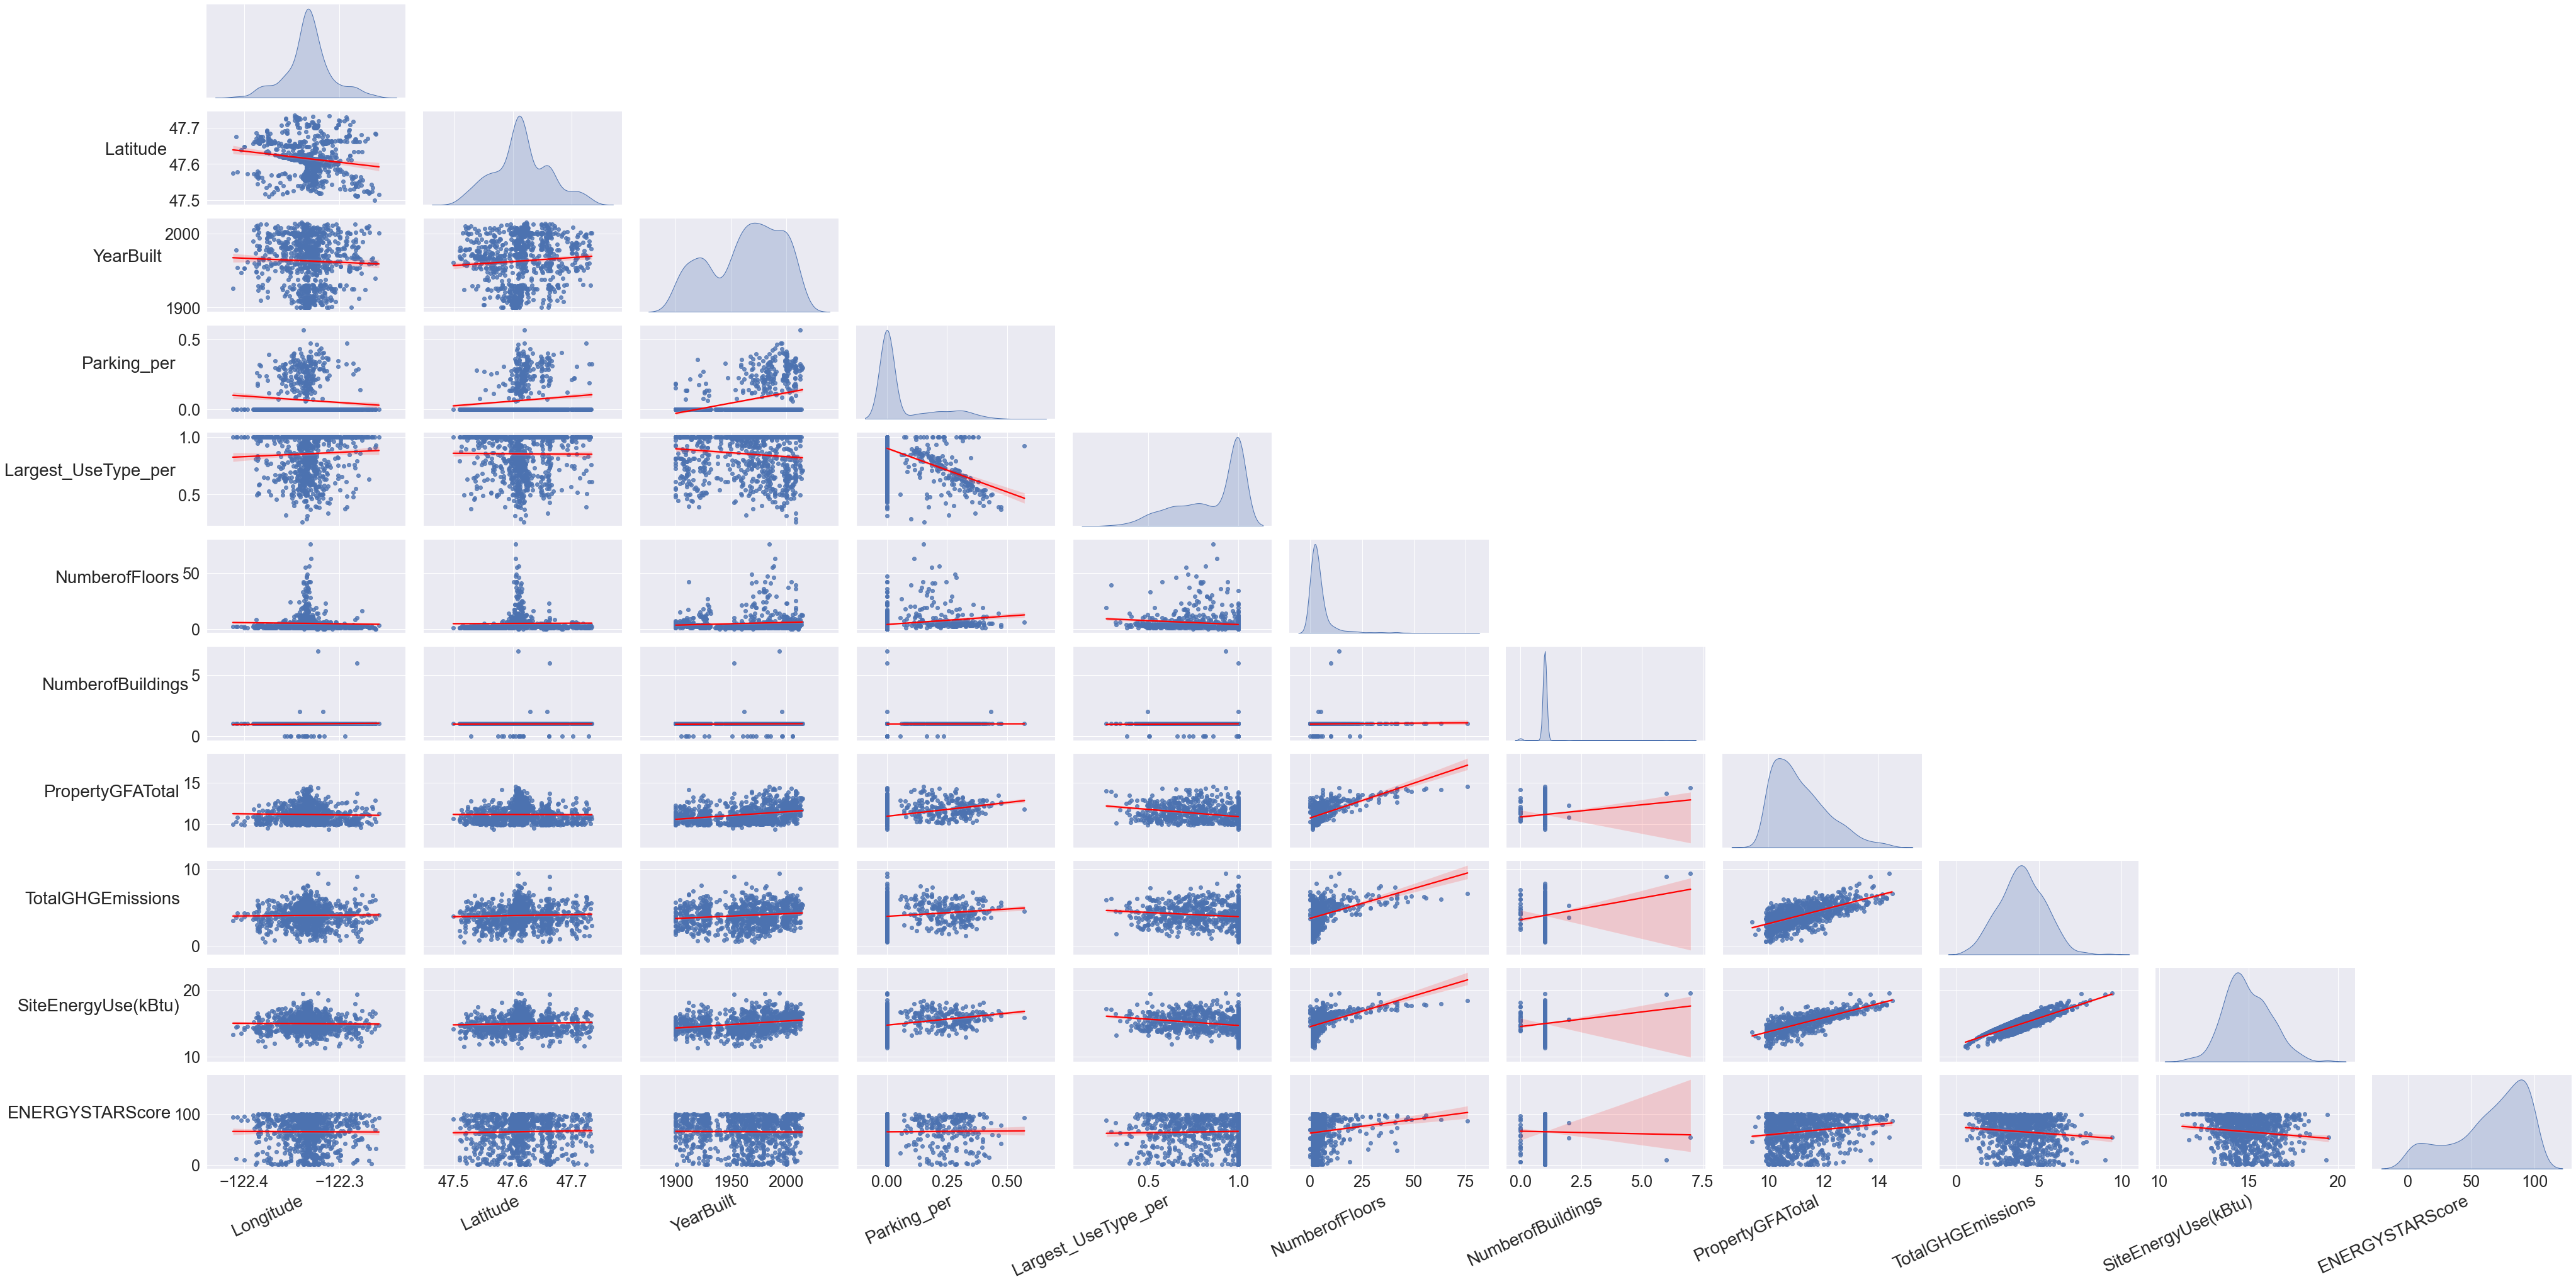

In [47]:
# Analyse de la relation entre les variables (pairplot)

sns.set(font_scale=2.3)

g = sns.pairplot(df_model[lst_variables], corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}},
                diag_kind = "kde", aspect=2)
g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 25)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

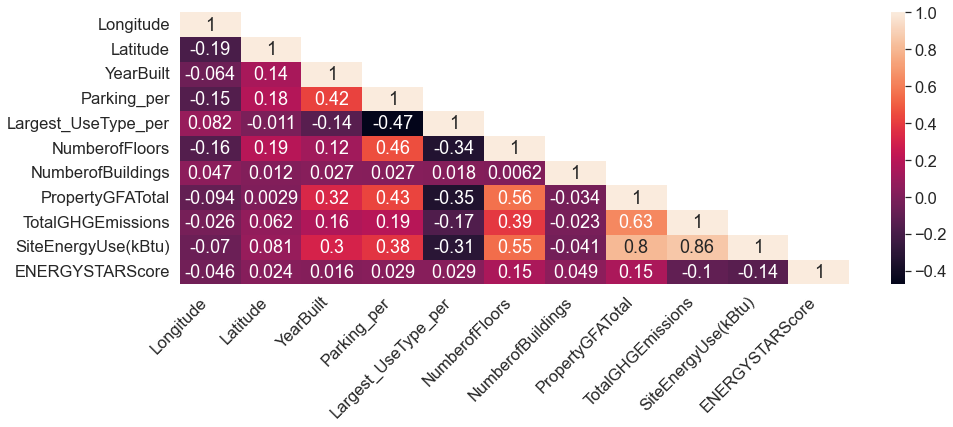

In [48]:
# Mesure du coeficient de corrélation (Non paramétrique : Spearman rank correlation) entre les variables. 

corr = df_model[lst_variables].corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

plt.rcParams["figure.figsize"] = (15,5)

sns.set(font_scale=1.5,style='white')
hm = sns.heatmap(corr, annot = True,mask=mask)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
hm.set(xlabel=None,ylabel=None)
plt.show()

In [49]:
#encodage des variables catégorielles

lst_Columns_categ = ["CouncilDistrictCode",'PrimaryPropertyType','Neighborhood']

for columns in lst_Columns_categ:
    df_model = pd.get_dummies(df_model, columns=[columns])


In [50]:
# Export des données formatées pour la modélisation
df_model.to_csv("2016_Building_Energy_Benchmarking_model.csv", sep=';',index=False)